# <center>  Spread Visualization and Prediction of the Novel Coronavirus Disease COVID-19 Using Machine Learning </center>
### <center> by Zahra Taheri - July 2020 </center>
 
<center> <img  src=https://wineamerica.org/wp-content/uploads/2020/03/Covid-19-Atlantic.jpeg width="400"/></center>
    
<center>image source: https://wineamerica.org/wp-content/uploads/2020/03/Covid-19-Atlantic.jpeg</center>
 

 <br>
 
The current destructive pandemic of coronavirus disease 2019 (COVID-19), caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) [[1]](https://www.who.int/emergencies/diseases/novel-coronavirus-2019/technical-guidance/naming-the-coronavirus-disease-(covid-2019)-and-the-virus-that-causes-it), was first reported in Wuhan, China, in December 2019 [[2]](https://www.who.int/csr/don/12-january-2020-novel-coronavirus-china/en/). The outbreak has affected millions of people around the world and the number of infections and mortalities has been growing at an alarming rate. In such a situation, forecasting and proper study of the pattern of disease spread can inspire design better strategies to make more efficient decisions. Moreover, such studies play an important role in achieving accurate predictions. 

Machine learning has numerous tools  that can be used for visualization and prediction, and nowadays it is used worldwide for study of the pattern of COVID-19 spread. One of the main focus of the study in this project is to use machine learning techniques to analyze and visualize the spreading of the virus country-wise as well as globally during a specific period of time by considering confirmed cases, recovered cases and fatalities.

The global impact of the outbreak on various aspects of life has been the focus of many studies. On the other hand, a pandemic can be forecast by considering a variety of parameters such as the impact of environmental factors, quarantine, age, gender and a lot more. 

The forecasting accuracy depends on the availability of proper data to base its predictions and provide an estimate of uncertainty. A challenge to use machine learning techniques for the current outbreak is that the datasets are not yet standardized by any standardization organization and the statistical anomalies are not considered. Also, the appropriate selection of parameters and the selection of the best machine learning model for prediction are other challenges involved in training a model. 

In this project, we are going to perform Linear regression, Support vector machine, Multilayer perceptron, Ensemble methods, etc., on the Johns Hopkins University's COVID-19 data to anticipate the future effects of COVID-19 pandemic in Iran and some other countries. Moreover, we are going to study the impact of some parameters such as geographic conditions, economic statistics, population statistics, life expectancy, etc., in prediction of COVID-19 spread.
<br>

- Data sources: 
    - [COVID-19 datasets from Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19)
    - [World-happiness dataset from Kaggle](https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv)
    - [Population by country - 2020 from Kaggle](https://www.kaggle.com/tanuprabhu/population-by-country-2020)
- More information: 
    - [World Health Organization (WHO)](https://www.who.int/emergencies/diseases/novel-coronavirus-2019)    
- Last datasets update:
    - 21 July 2020    
- My contact Info: 
    - https://github.com/zata213/
    - zahra.taheri518@gmail.com 


# Current date and time

In [1]:
from datetime import datetime

print(datetime.now())

2020-07-23 17:54:17.720868


# Preperation for Google colab

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# unzip dataset files from google drive to content folder in colab

import os

if os.path.exists("/content/covid19-data/")==False:
  print("unzip files!")
  !unzip -q "/content/covid19-data.zip"


# Import some libraries

In [4]:
# for dataset handeling and calculations
import numpy as np 
import pandas as pd 

# for basic visualizations
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
%matplotlib inline 

# for advanced visualizations
import seaborn as sns

# for interactive visualizations
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# for offline ploting 
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

# to hide warnings
import warnings
warnings.filterwarnings('ignore')

# for date and time operations
from datetime import datetime,timedelta

# for file and folder operations
import os

# for modelling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.tsa.arima_model import ARIMA
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Path to the files directory

In [5]:
mypath = "/content/covid19-data"

# path to the directory
os.chdir(mypath)

print(os.getcwd())

/content/covid19-data


# Read datasets

In [6]:
#main_df=pd.read_csv('covid19_full_cleaned.csv') 
covid19_date_country=pd.read_csv('covid19_date_country.csv')
#iran_df=covid19_date_country[covid19_date_country['Country/Region'] == 'Iran']
iran_df=pd.read_csv('covid19_iran.csv')
covid19_country_latest=pd.read_csv('covid19_country_latest.csv')
covid19_world=pd.read_csv('covid19_world.csv')

## [WHO regions](https://www.who.int/choice/demography/by_country/en/)

- African Region (AFRO)
- Region of the Americas (PAHO)
- South-East Asia Region (SEARO)
- European Region (EURO)
- Eastern Mediterranean Region (EMRO)
- Western Pacific Region (WPRO)

In [7]:
# convert dates to proper date formats

covid19_date_country['Date'] = pd.to_datetime(covid19_date_country['Date'])

iran_df['Date'] = pd.to_datetime(iran_df['Date'])

covid19_world['Date'] = pd.to_datetime(covid19_world['Date'])

# Data modelling and prediction based on univariate time series

## Prediction of total confirmed cases of the world

In [11]:
# find numbers related to dates
numbers_of_dates = covid19_world.index.values.reshape(-1, 1)

# number of days in future considered to forecast
future_days = 10

# find numbers related to days from start to future
numbers_start_to_futures = np.array([i for i in range(covid19_world.shape[0]+future_days)]).reshape(-1, 1)

# first date in the dataset
first_date = covid19_world['Date'].tolist()[0]

# find dates related to days from start to future for better visualization
dates_start_to_futures = pd.Series([(first_date + timedelta(days=i)) for i in range(len(numbers_start_to_futures))])
print(dates_start_to_futures.shape)

(192,)


In [12]:
#Splitting the dataset related to confirmed cases of the world into training and test sets

X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(numbers_of_dates[50:],
                                                                                covid19_world['Confirmed'][50:].values,
                                                                                test_size = 0.2, shuffle=False)

print(X_train_confirmed.shape)
print(y_train_confirmed.shape)
print(X_test_confirmed.shape)
print(y_test_confirmed.shape)

(105, 1)
(105,)
(27, 1)
(27,)


### Support vector machine regressor

RMSE of  SVR 84855.25
MAE of  SVR 76772.28 



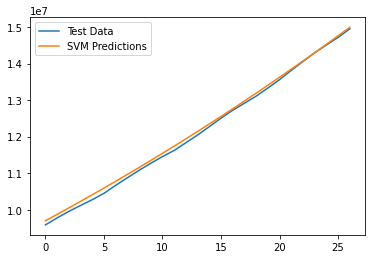

In [13]:
svm_reg = SVR(C=0.1,kernel='poly',gamma=0.01, epsilon=1)
svm_reg.fit(X_train_confirmed, y_train_confirmed)

svm_pred = svm_reg.predict(numbers_start_to_futures[50:].reshape(-1,1))

y_pred = svm_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'SVM Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg.__class__.__name__, round(rmse,2))
print("MAE of ", svm_reg.__class__.__name__, round(mae,2), '\n')

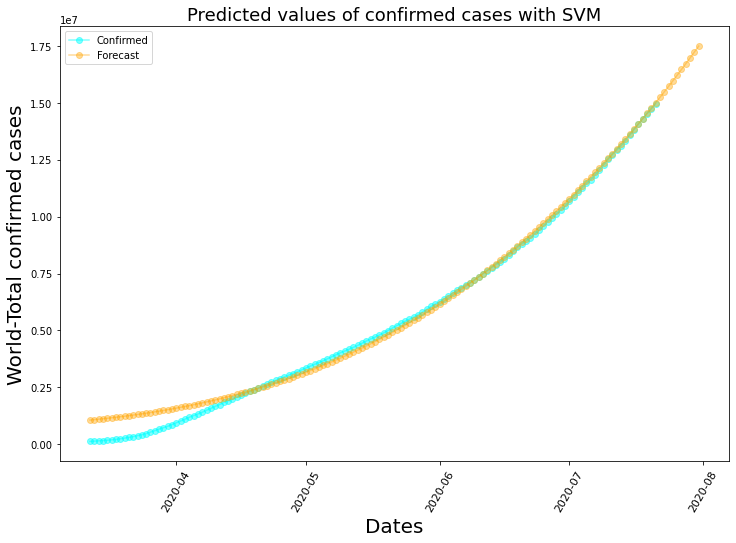

In [14]:
dates = dates_start_to_futures[50:-10]

world_df=covid19_world.iloc[50:,:] 

plt.figure(figsize= (12,8))
plt.xticks(rotation = 60 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('World-Total confirmed cases',fontsize = 20)
plt.title("Predicted values of confirmed cases with SVM" , fontsize = 18)

plt.plot_date(y= world_df['Confirmed'].values, x= dates, label = 'Confirmed',alpha=0.5,linestyle ='-',color = 'cyan')
plt.plot_date(y= svm_pred,x= dates_start_to_futures[50:],label = 'Forecast',alpha=0.4,linestyle ='-',color = 'orange')
plt.legend()

### Linear regression

coef:  [ 7.66225098e+06 -4.13336809e+05  7.37227441e+03 -4.92032568e+01
  1.25055350e-01]
RMSE of  LinearRegression 880383.54
MAE of  LinearRegression 700913.18 



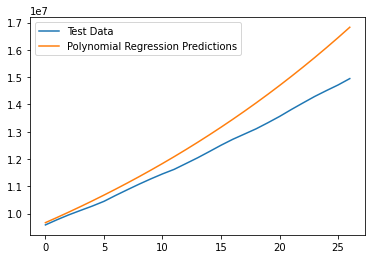

In [15]:
# transform the training data

poly_features=PolynomialFeatures(degree=4)

poly_X_train_confirmed = poly_features.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly_features.fit_transform(X_test_confirmed)
poly_future_forecast = poly_features.fit_transform(numbers_start_to_futures[50:])

# fit a Linear Regression model
lin_reg=LinearRegression(normalize=True, fit_intercept=False)

lin_reg.fit(poly_X_train_confirmed,y_train_confirmed)
coef=lin_reg.coef_
print("coef: ", coef)

y_pred = lin_reg.predict(poly_X_test_confirmed)

poly_pred = lin_reg.predict(poly_future_forecast)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", lin_reg.__class__.__name__, round(rmse,2))
print("MAE of ", lin_reg.__class__.__name__, round(mae,2), '\n')

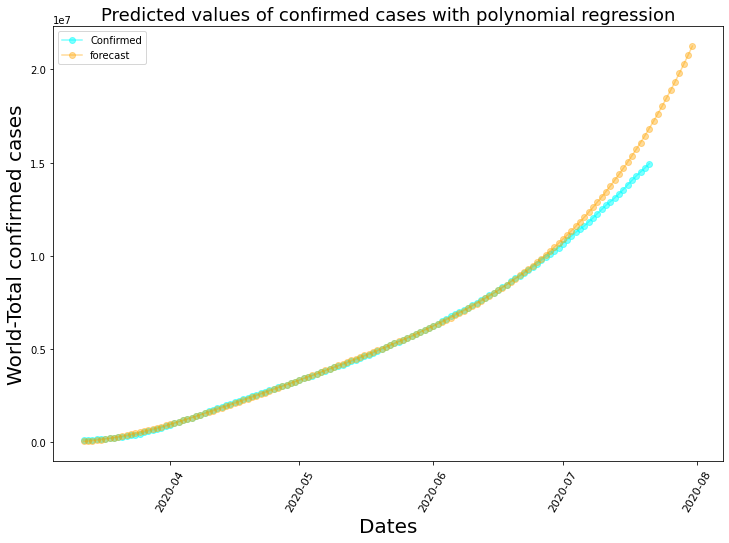

In [16]:
dates = dates_start_to_futures[50:-10]

world_df=covid19_world.iloc[50:,:] 

plt.figure(figsize= (12,8))
plt.xticks(rotation = 60 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('World-Total confirmed cases',fontsize = 20)
plt.title("Predicted values of confirmed cases with polynomial regression" , fontsize = 18)

plt.plot_date(y= world_df['Confirmed'].values, x= dates, label = 'Confirmed',alpha=0.5,linestyle ='-',color = 'cyan')
plt.plot_date(y= poly_pred,x= dates_start_to_futures[50:],label = 'forecast',alpha=0.4,linestyle ='-',color = 'orange')
plt.legend()

### Random Forests Regressor

RMSE of  RandomForestRegressor 3254934.58
MAE of  RandomForestRegressor 2825871.56 



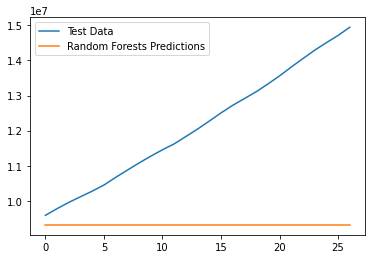

In [17]:
rf_reg = RandomForestRegressor(max_depth=7,n_estimators=5000, random_state=42)

rf_reg.fit(X_train_confirmed, y_train_confirmed)

rf_pred = rf_reg.predict(numbers_start_to_futures[50:].reshape(-1,1))

y_pred = rf_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'Random Forests Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", rf_reg.__class__.__name__, round(rmse,2))
print("MAE of ", rf_reg.__class__.__name__, round(mae,2), '\n')

In [18]:
y_pred

array([9312981.5104, 9312981.5104, 9312981.5104, 9312981.5104,
       9312981.5104, 9312981.5104, 9312981.5104, 9312981.5104,
       9312981.5104, 9312981.5104, 9312981.5104, 9312981.5104,
       9312981.5104, 9312981.5104, 9312981.5104, 9312981.5104,
       9312981.5104, 9312981.5104, 9312981.5104, 9312981.5104,
       9312981.5104, 9312981.5104, 9312981.5104, 9312981.5104,
       9312981.5104, 9312981.5104, 9312981.5104])

In [19]:
y_test_confirmed

array([ 9586161,  9777507,  9955617, 10117247, 10275819, 10449717,
       10667406, 10875111, 11078605, 11272172, 11454867, 11622210,
       11833054, 12044856, 12273083, 12505660, 12721988, 12914656,
       13107435, 13328887, 13560006, 13812547, 14054586, 14292221,
       14506868, 14713646, 14947101])

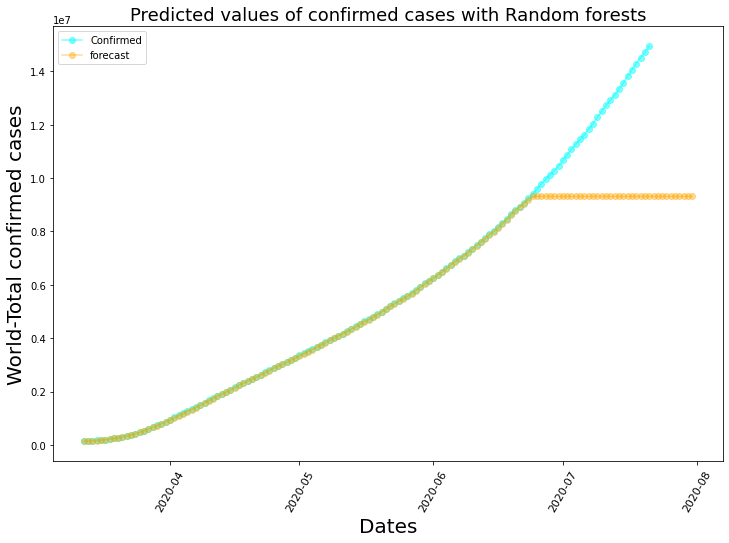

In [20]:
dates = dates_start_to_futures[50:-10]

world_df=covid19_world.iloc[50:,:] 

plt.figure(figsize= (12,8))
plt.xticks(rotation = 60 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('World-Total confirmed cases',fontsize = 20)
plt.title("Predicted values of confirmed cases with Random forests" , fontsize = 18)

plt.plot_date(y= world_df['Confirmed'].values, x= dates, label = 'Confirmed',alpha=0.5,linestyle ='-',color = 'cyan')
plt.plot_date(y= rf_pred,x= dates_start_to_futures[50:],label = 'forecast',alpha=0.4,linestyle ='-',color = 'orange')
plt.legend()

### XGBoost Regressor

In [21]:
xgb_reg=XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
xgb_reg.fit(X_train_confirmed, y_train_confirmed, early_stopping_rounds=10,
            eval_set=[(X_test_confirmed, y_test_confirmed)],verbose=0)

[13:03:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=4, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

RMSE of  XGBRegressor 3172578.3
MAE of  XGBRegressor 2730605.07 



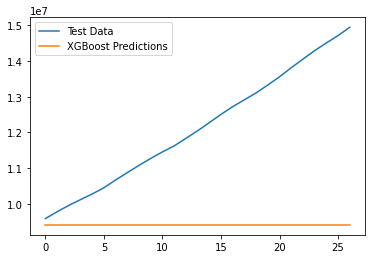

In [22]:
xgb_reg=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1,
             n_estimators=1000, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

xgb_reg.fit(X_train_confirmed, y_train_confirmed)

xgb_pred = xgb_reg.predict(numbers_start_to_futures[50:])

y_pred = xgb_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'XGBoost Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", xgb_reg.__class__.__name__, round(rmse,2))
print("MAE of ", xgb_reg.__class__.__name__, round(mae,2), '\n')

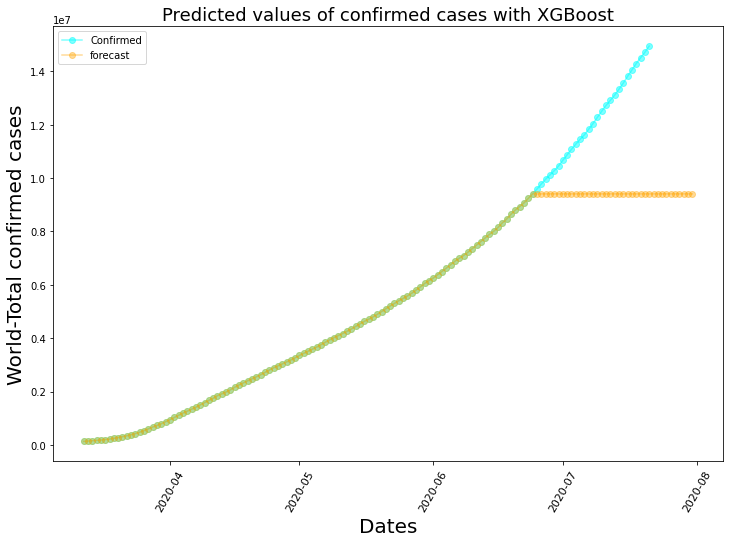

In [23]:
dates = dates_start_to_futures[50:-10]

world_df=covid19_world.iloc[50:,:] 

plt.figure(figsize= (12,8))
plt.xticks(rotation = 60 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('World-Total confirmed cases',fontsize = 20)
plt.title("Predicted values of confirmed cases with XGBoost" , fontsize = 18)

plt.plot_date(y= world_df['Confirmed'].values, x= dates, label = 'Confirmed',alpha=0.5,linestyle ='-',color = 'cyan')
plt.plot_date(y= xgb_pred,x= dates_start_to_futures[50:],label = 'forecast',alpha=0.4,linestyle ='-',color = 'orange')
plt.legend()

### ARIMA for prediction

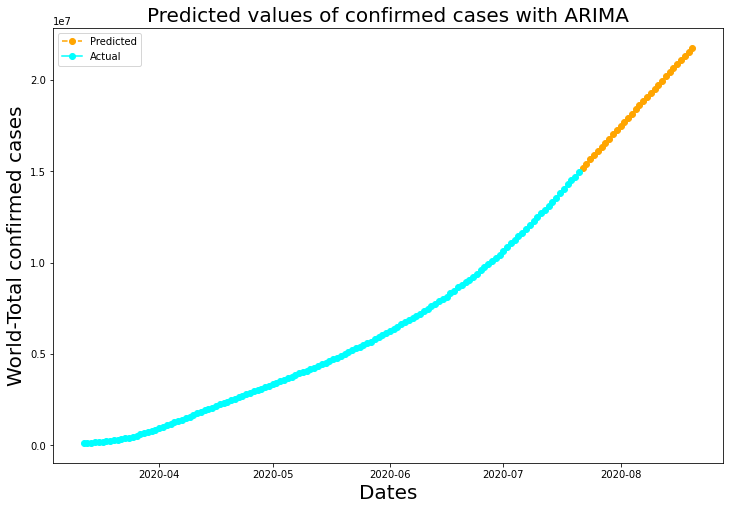

In [24]:
data = pd.DataFrame(columns = ['Date','y'])
data['Date'] = covid19_world['Date'][50:]
data['y'] = covid19_world['Confirmed'][50:].values

arima = ARIMA(data['y'], order=(5, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 30)
pred = list(forecast[0])

start_date = data['Date'].max()
prediction_dates = []
for i in range(30):
    date = start_date + timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (12,8))
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('World-Total confirmed cases',fontsize = 20)
plt.title("Predicted values of confirmed cases with ARIMA" , fontsize = 20)

plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = 'orange',label = 'Predicted');
plt.plot_date(y=data['y'],x=data['Date'],linestyle = '-',color = 'cyan',label = 'Actual');
plt.legend();

### Prophet Model for prediction
Note: I could not run these part of cells in my PC, because I had some problems with installation of `fbprophet` on Windows 10. So, I run it in kaggle notebook and then put its image as the output of this cell.

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


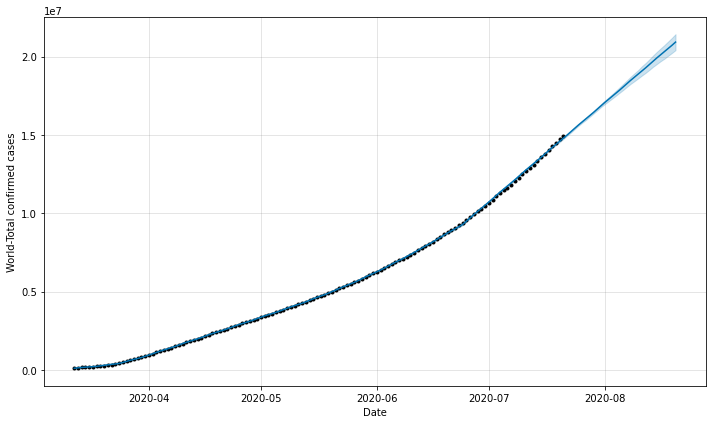

In [25]:
data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = covid19_world['Date'][50:]
data['y'] = covid19_world['Confirmed'][50:].values

prop=Prophet()
prop.fit(data)
future=prop.make_future_dataframe(periods=30)
prop_forecast=prop.predict(future)
forecast = prop_forecast[['ds','yhat']].tail(30)

fig = plot_plotly(prop, prop_forecast)
fig = prop.plot(prop_forecast,xlabel='Date',ylabel='World-Total confirmed cases')

## Prediction of total death cases of the world

In [26]:
#Splitting the dataset related to death cases of the world into training and test sets

X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(numbers_of_dates[50:],
                                                                                covid19_world['Deaths'][50:].values,
                                                                                test_size = 0.2, shuffle=False)

print(X_train_death.shape)
print(y_train_death.shape)
print(X_test_death.shape)
print(y_test_death.shape)

(105, 1)
(105,)
(27, 1)
(27,)


### Support vector machine regressor

RMSE of  SVR 140122.16
MSE of  SVR 19634218554.86
MAE of  SVR 132050.46 



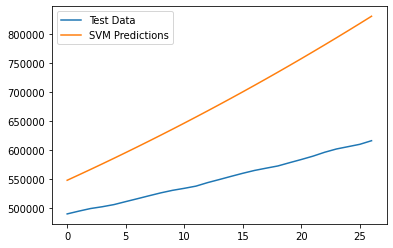

In [27]:
svm_reg = SVR(C=0.01,kernel='poly',gamma=0.01)
svm_reg.fit(X_train_death, y_train_death)

svm_pred = svm_reg.predict(numbers_start_to_futures[50:])

y_pred = svm_reg.predict(X_test_death)

plt.plot(y_test_death)
plt.plot(y_pred)
plt.legend(['Test Data', 'SVM Predictions'])

mae=mean_absolute_error(y_pred, y_test_death)
mse=mean_squared_error(y_pred, y_test_death)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg.__class__.__name__, round(rmse,2))
print("MSE of ", svm_reg.__class__.__name__, round(mse,2))
print("MAE of ", svm_reg.__class__.__name__, round(mae,2), '\n')

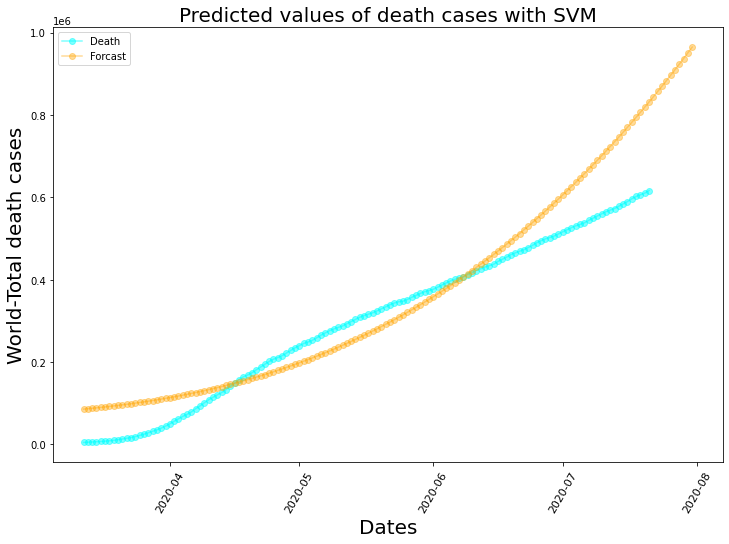

In [28]:
dates = dates_start_to_futures[50:-10]

world_df=covid19_world.iloc[50:,:] 

plt.figure(figsize= (12,8))
plt.xticks(rotation = 60 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('World-Total death cases',fontsize = 20)
plt.title("Predicted values of death cases with SVM" , fontsize = 20)

plt.plot_date(y= world_df['Deaths'].values, x= dates, label = 'Death',alpha=0.5,linestyle ='-',color = 'cyan')
plt.plot_date(y= svm_pred,x= dates_start_to_futures[50:],label = 'Forcast',alpha=0.4,linestyle ='-',color = 'orange')
plt.legend()

### Linear regression

coef:  [ 2.33487709e+06 -1.21007616e+05  2.29232371e+03 -1.97679081e+01
  8.13529452e-02 -1.28597429e-04]
RMSE of  LinearRegression 19337.55
MSE of  LinearRegression 373940929.56
MAE of  LinearRegression 16980.49 



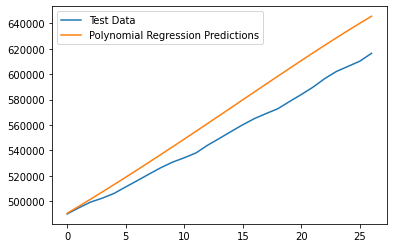

In [29]:
# transform the training data

poly_features=PolynomialFeatures(degree=5)

poly_X_train_death = poly_features.fit_transform(X_train_death)
poly_X_test_death = poly_features.fit_transform(X_test_death)
poly_future_forecast = poly_features.fit_transform(numbers_start_to_futures[50:])

# fit a Linear Regression model
lin_reg=LinearRegression(normalize=True, fit_intercept=False)

lin_reg.fit(poly_X_train_death,y_train_death)
coef=lin_reg.coef_
print("coef: ", coef)

y_pred = lin_reg.predict(poly_X_test_death)

poly_pred = lin_reg.predict(poly_future_forecast)

plt.plot(y_test_death)
plt.plot(y_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

mae=mean_absolute_error(y_pred, y_test_death)
mse=mean_squared_error(y_pred, y_test_death)
rmse = np.sqrt(mse)
print("RMSE of ", lin_reg.__class__.__name__, round(rmse,2))
print("MSE of ", lin_reg.__class__.__name__, round(mse,2))
print("MAE of ", lin_reg.__class__.__name__, round(mae,2), '\n')

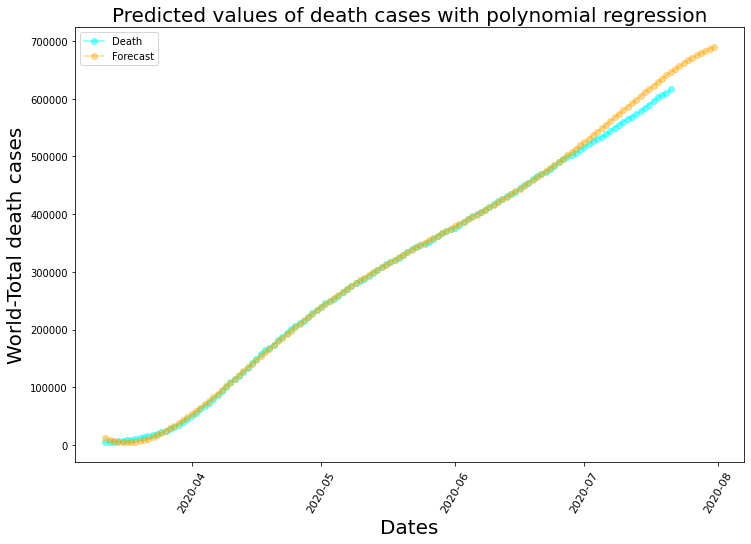

In [30]:
dates = dates_start_to_futures[50:-10]

world_df=covid19_world.iloc[50:,:] 

plt.figure(figsize= (12,8))
plt.xticks(rotation = 60 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('World-Total death cases',fontsize = 20)
plt.title("Predicted values of death cases with polynomial regression" , fontsize = 20)

plt.plot_date(y= world_df['Deaths'].values, x= dates, label = 'Death',alpha=0.5,linestyle ='-',color = 'cyan')
plt.plot_date(y= poly_pred,x= dates_start_to_futures[50:],label = 'Forecast',alpha=0.4,linestyle ='-',color = 'orange')
plt.legend()

### ARIMA for prediction

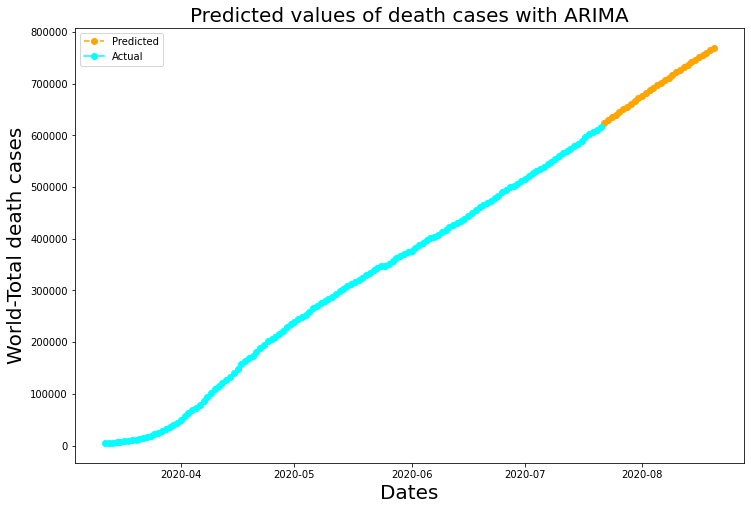

In [31]:
data = pd.DataFrame(columns = ['Date','y'])
data['Date'] = covid19_world['Date'][50:]
data['y'] = covid19_world['Deaths'][50:].values

arima = ARIMA(data['y'], order=(5, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 30)
pred = list(forecast[0])

start_date = data['Date'].max()
prediction_dates = []
for i in range(30):
    date = start_date + timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (12,8))
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('World-Total death cases',fontsize = 20)
plt.title("Predicted values of death cases with ARIMA" , fontsize = 20)

plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = 'orange',label = 'Predicted');
plt.plot_date(y=data['y'],x=data['Date'],linestyle = '-',color = 'cyan',label = 'Actual');
plt.legend();

### Prophet Model for prediction

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


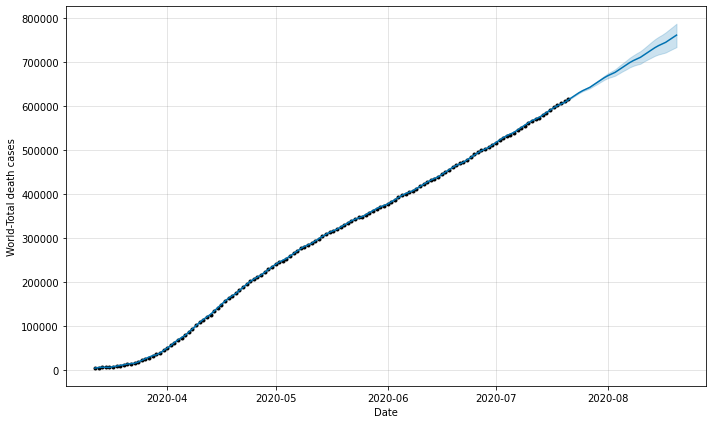

In [32]:
data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = covid19_world['Date'][50:]
data['y'] = covid19_world['Deaths'][50:].values

prop=Prophet()
prop.fit(data)
future=prop.make_future_dataframe(periods=30)
prop_forecast=prop.predict(future)
forecast = prop_forecast[['ds','yhat']].tail(30)

fig = plot_plotly(prop, prop_forecast)
fig = prop.plot(prop_forecast,xlabel='Date',ylabel='World-Total death cases')

## Prediction of confirmed cases of 5 most affected countries and Iran using ARIMA and Prophet

### ARIMA for prediction

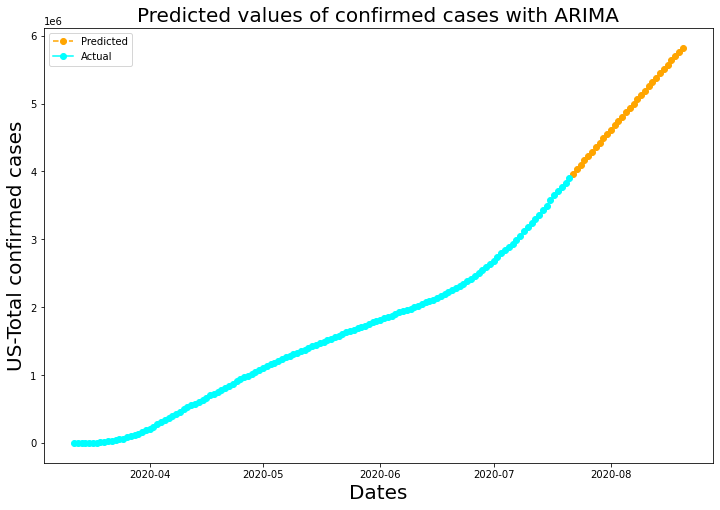

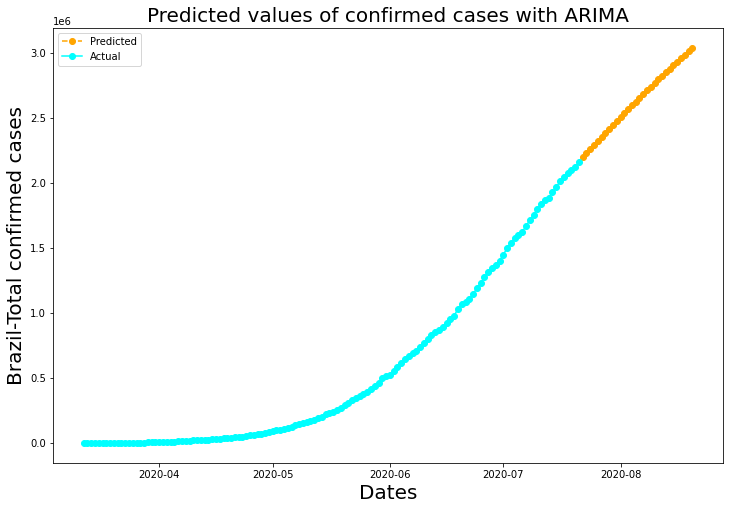

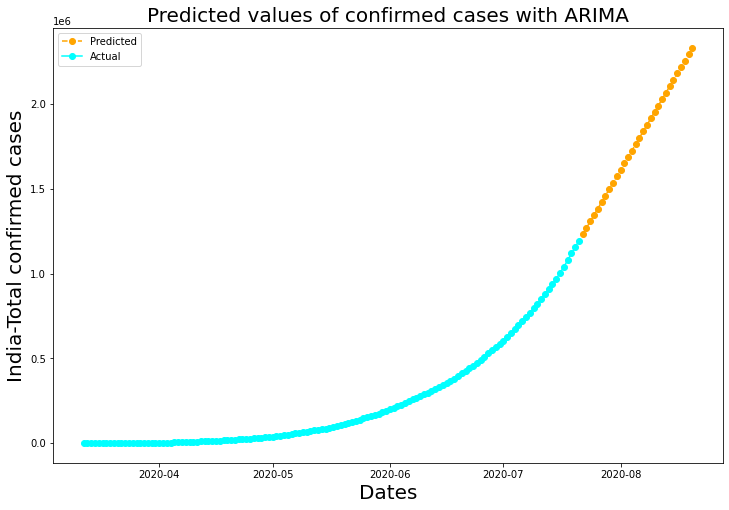

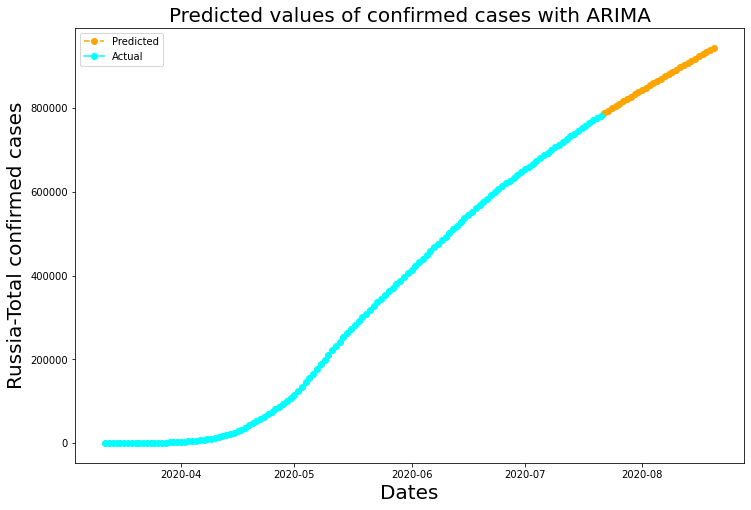

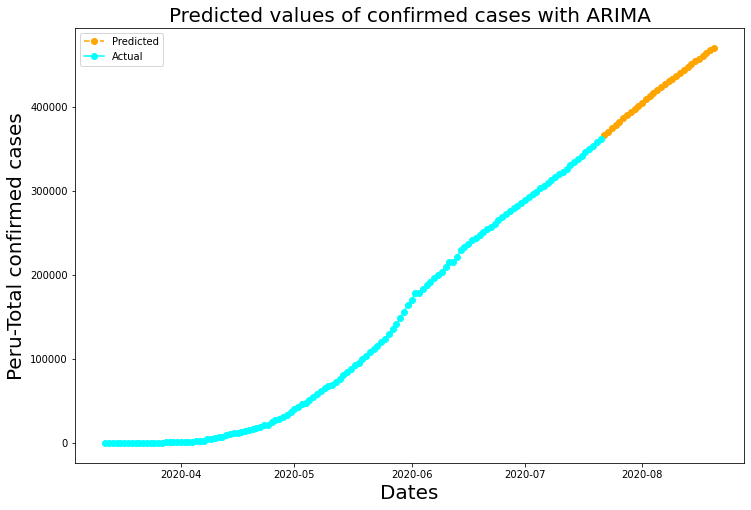

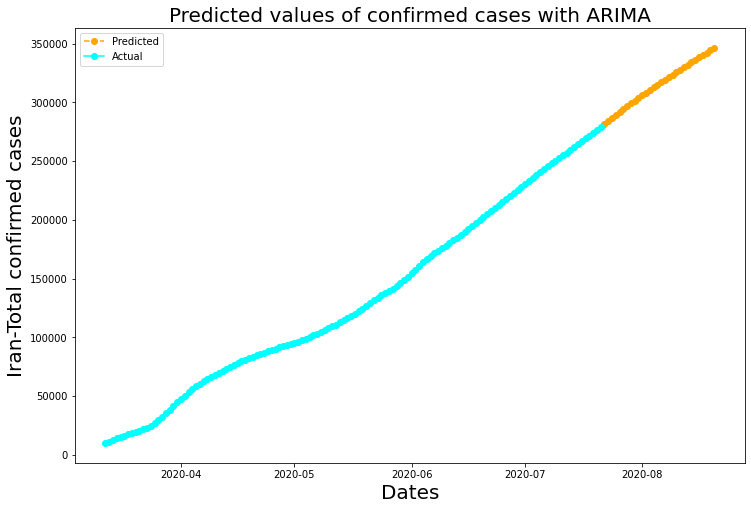

In [33]:
most_affected5=['US','Brazil','India','Russia','Peru','Iran']

def country_df(i):
    df=covid19_date_country[covid19_date_country['Country/Region'] == most_affected5[i]].iloc[50:,:]
    return df

k=0
for j in most_affected5:
    data = pd.DataFrame(columns = ['Date','y'])
    data['Date'] = covid19_world['Date'][50:]
    data['y'] = country_df(k)['Confirmed'].values

    arima = ARIMA(data['y'], order=(5, 1, 0))
    arima = arima.fit(trend='c', full_output=True, disp=True)
    forecast = arima.forecast(steps= 30)
    pred = list(forecast[0])

    start_date = data['Date'].max()
    prediction_dates = []
    for i in range(30):
        date = start_date + timedelta(days=1)
        prediction_dates.append(date)
        start_date = date
    plt.figure(figsize= (12,8))
    plt.xlabel("Dates",fontsize = 20)
    plt.ylabel('%s-Total confirmed cases' %(j),fontsize = 20)
    plt.title("Predicted values of confirmed cases with ARIMA" , fontsize = 20)

    plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = 'orange',label = 'Predicted');
    plt.plot_date(y=data['y'],x=data['Date'],linestyle = '-',color = 'cyan',label = 'Actual');
    plt.legend();
    k=k+1

### Prophet Model for prediction

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

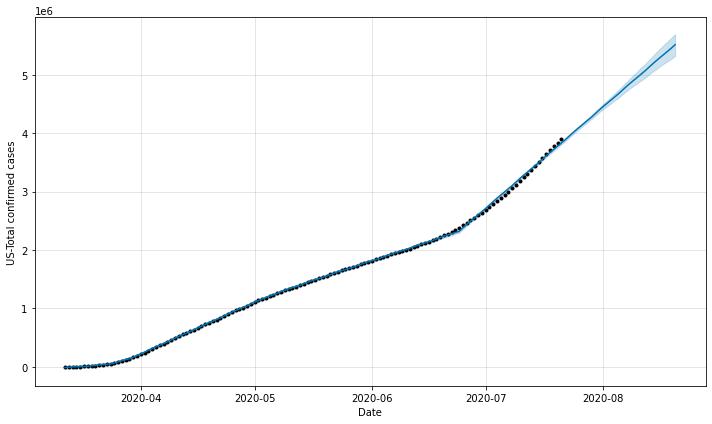

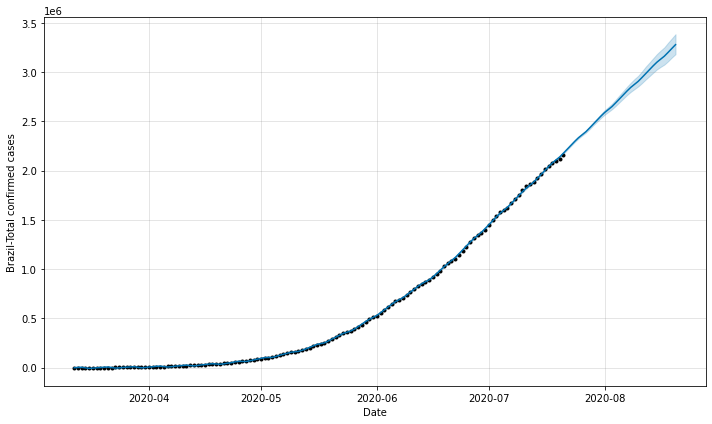

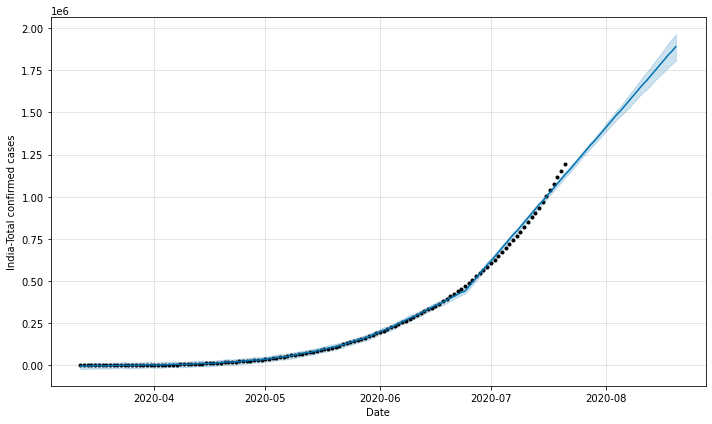

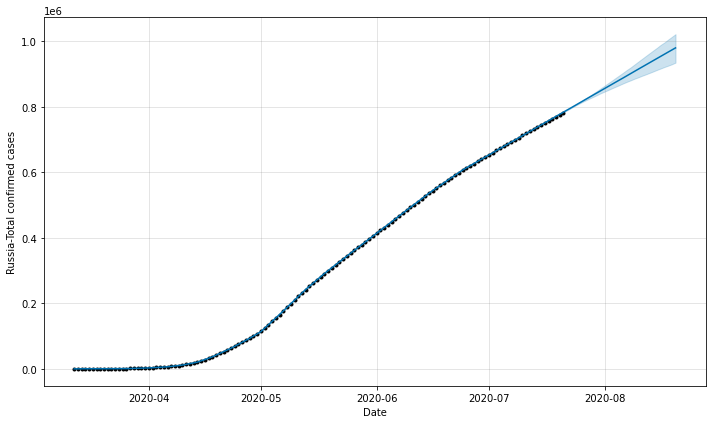

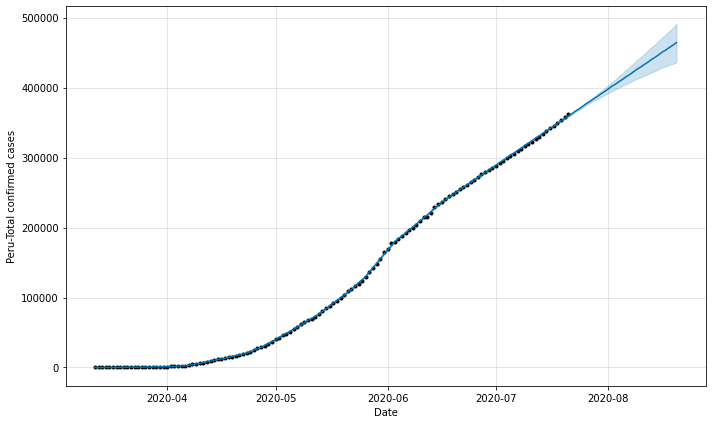

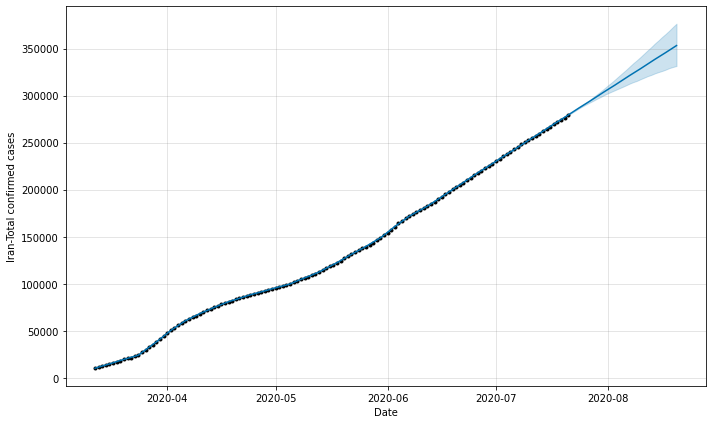

In [34]:
#most_affected5=['US','Brazil','India','Russia','Peru','Iran']

def country_df(i):
    df=covid19_date_country[covid19_date_country['Country/Region'] == most_affected5[i]].iloc[50:,:]
    return df

k=0
for j in most_affected5:
    data = pd.DataFrame(columns = ['ds','y'])
    data['ds'] = covid19_world['Date'][50:]
    data['y'] = country_df(k)['Confirmed'].values

    prop=Prophet()
    prop.fit(data)
    future=prop.make_future_dataframe(periods=30)
    prop_forecast=prop.predict(future)
    forecast = prop_forecast[['ds','yhat']].tail(30)

    fig = plot_plotly(prop, prop_forecast)
    fig = prop.plot(prop_forecast,xlabel='Date',ylabel='%s-Total confirmed cases' %(j))
    k=k+1

## Prediction of deaths of 5 most affected countries and Iran using ARIMA and Prophet

### ARIMA for prediction

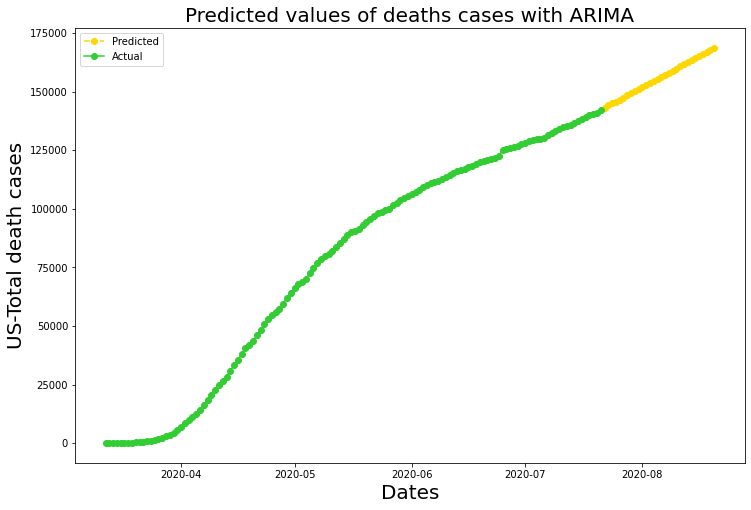

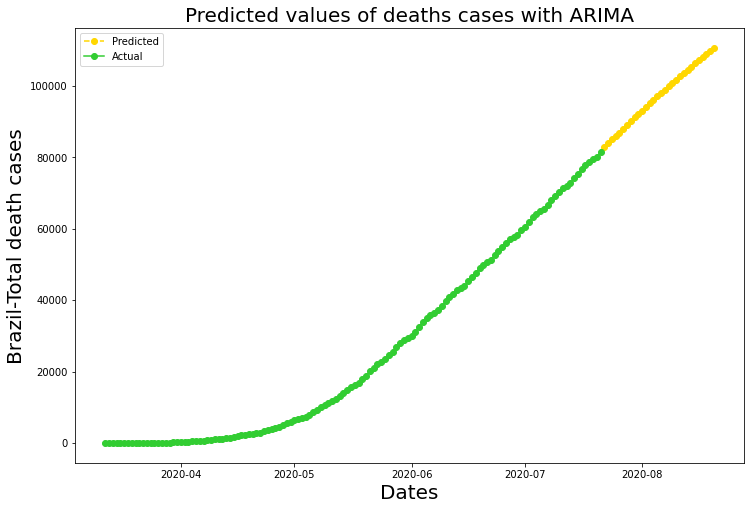

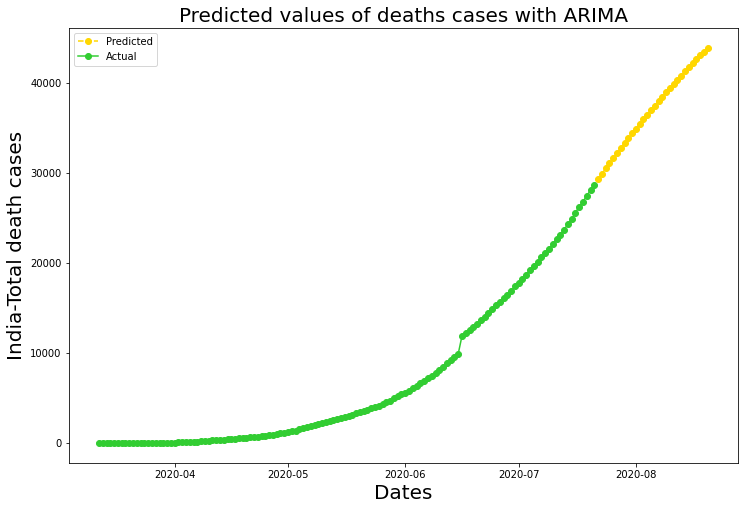

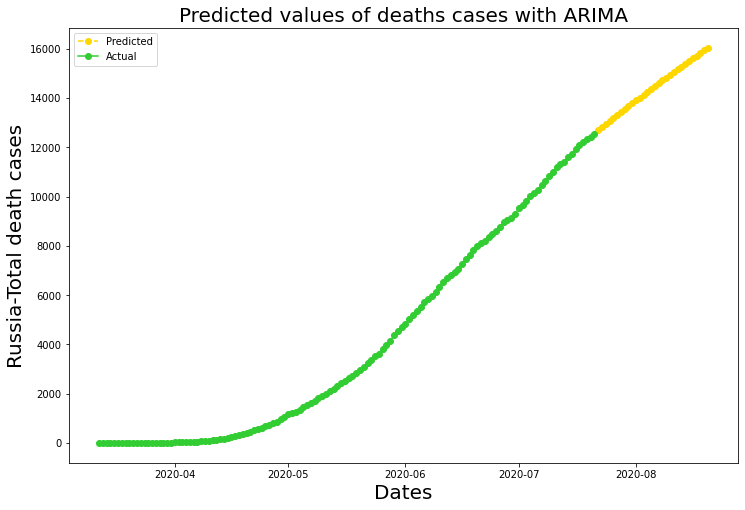

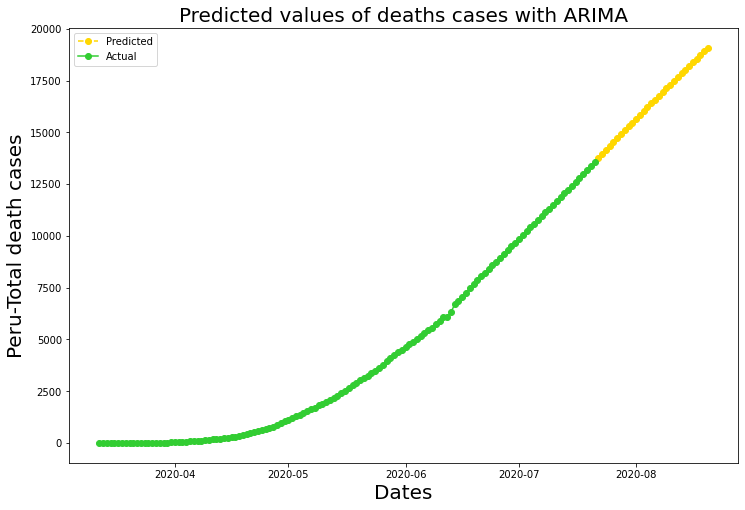

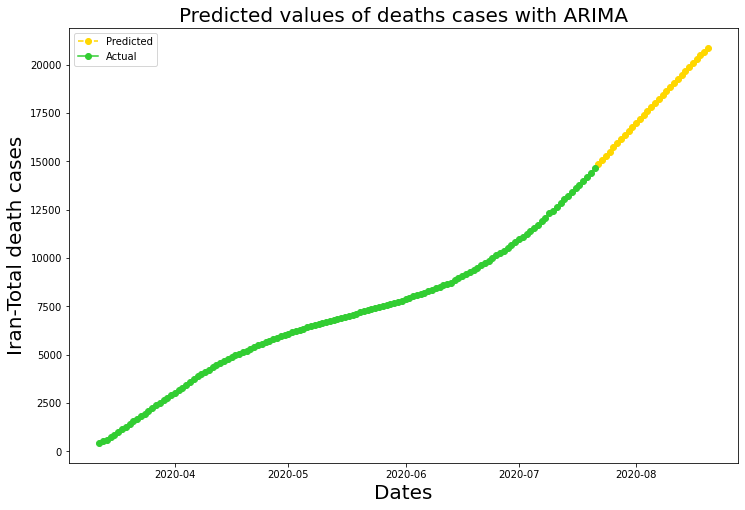

In [35]:
most_affected5=['US','Brazil','India','Russia','Peru','Iran']

def country_df(i):
    df=covid19_date_country[covid19_date_country['Country/Region'] == most_affected5[i]].iloc[50:,:]
    return df

k=0
for j in most_affected5:
    data = pd.DataFrame(columns = ['Date','y'])
    data['Date'] = covid19_world['Date'][50:]
    data['y'] = country_df(k)['Deaths'].values

    arima = ARIMA(data['y'], order=(5, 1, 0))
    arima = arima.fit(trend='c', full_output=True, disp=True)
    forecast = arima.forecast(steps= 30)
    pred = list(forecast[0])

    start_date = data['Date'].max()
    prediction_dates = []
    for i in range(30):
        date = start_date + timedelta(days=1)
        prediction_dates.append(date)
        start_date = date
    plt.figure(figsize= (12,8))
    plt.xlabel("Dates",fontsize = 20)
    plt.ylabel('%s-Total death cases' %(j),fontsize = 20)
    plt.title("Predicted values of deaths cases with ARIMA" , fontsize = 20)

    plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = 'gold',label = 'Predicted');
    plt.plot_date(y=data['y'],x=data['Date'],linestyle = '-',color = 'limegreen',label = 'Actual');
    plt.legend();
    k=k+1

### Prophet Model for prediction

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

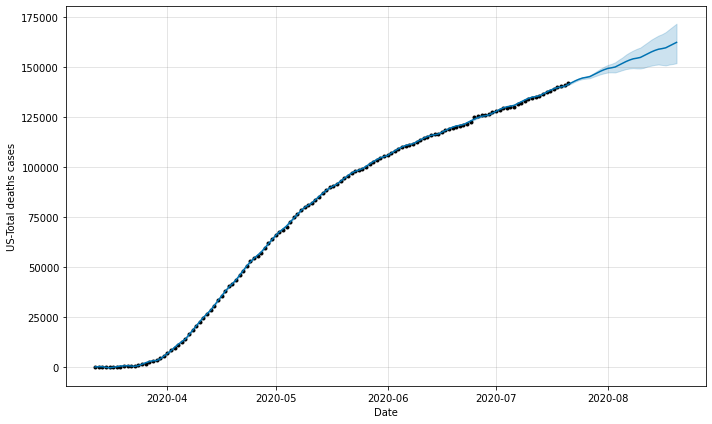

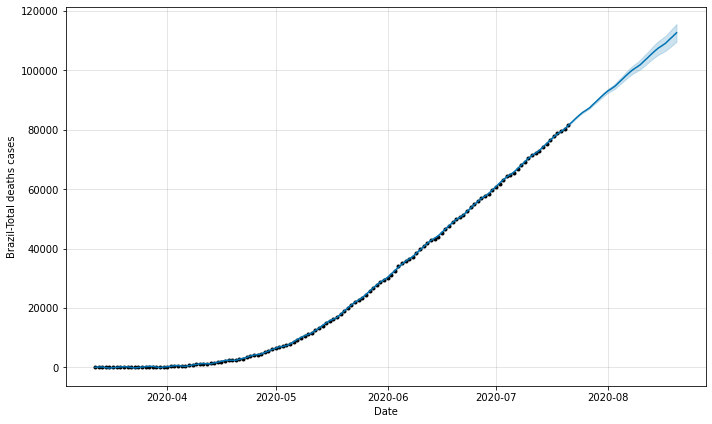

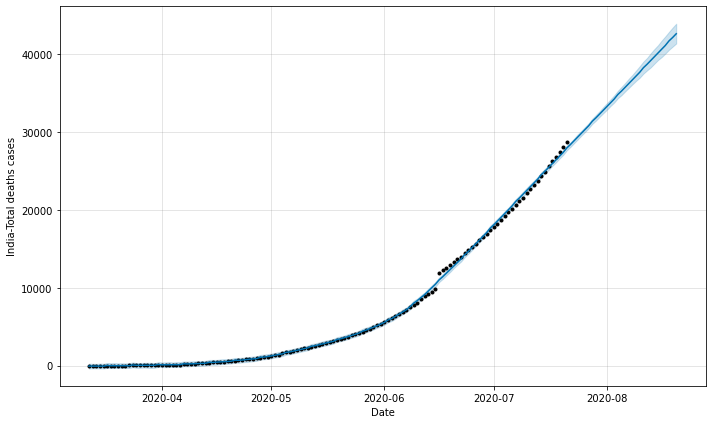

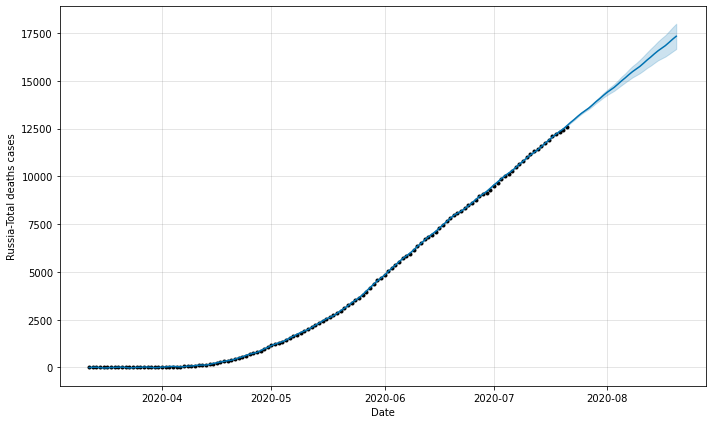

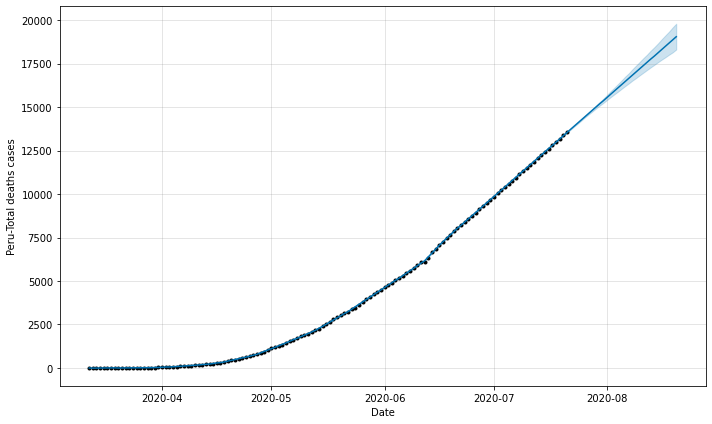

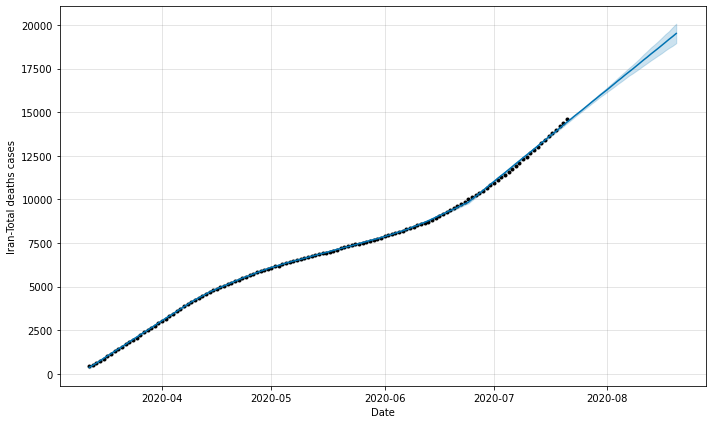

In [36]:
#most_affected5=['US','Brazil','India','Russia','Peru','Iran']

def country_df(i):
    df=covid19_date_country[covid19_date_country['Country/Region'] == most_affected5[i]].iloc[50:,:]
    return df

k=0
for j in most_affected5:
    data = pd.DataFrame(columns = ['ds','y'])
    data['ds'] = covid19_world['Date'][50:]
    data['y'] = country_df(k)['Deaths'].values

    prop=Prophet()
    prop.fit(data)
    future=prop.make_future_dataframe(periods=30)
    prop_forecast=prop.predict(future)
    forecast = prop_forecast[['ds','yhat']].tail(30)

    fig = plot_plotly(prop, prop_forecast)
    fig = prop.plot(prop_forecast,xlabel='Date',ylabel='%s-Total deaths cases' %(j))
    k=k+1

## Prediction of confirmed cases of Iran using MLP and LSTM-RNN

In [37]:
iran_df1=iran_df[['Date','Confirmed']].copy().loc[:]
iran_df1.head()

,Date,Confirmed
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [38]:
len(iran_df1)

182

In [39]:
# the size of the validation set (number of steps), i.e taking `n_steps` data points to predict `n_steps+1`th data point
#The batches would be [feed=[t_1,...,t_{n_steps}],predict=tt_{n_steps+1}].

n_steps=10

#n_steps=5

# training set size
train_size=len(iran_df1)-n_steps

conf=iran_df1['Confirmed'].values.reshape(-1,1)

# split training and test set
train = conf[:train_size]#['Confirmed'].values.reshape(-1,1)
test = conf[train_size:]#['Confirmed'].values.reshape(-1,1)

# scaling the data since the data is too skewed
normal = MinMaxScaler()

normal = normal.fit(train)

normal_train = normal.transform(train)
normal_test = normal.transform(test)

len(normal_train)

172

In [40]:
normal_test

array([[1.00856862],
       [1.01777616],
       [1.0276579 ],
       [1.03701831],
       [1.04681773],
       [1.05614287],
       [1.06463309],
       [1.07318603],
       [1.08264835],
       [1.09293775]])

### Multilayer Perceptron (MLP)

- Time Series Generator for generating batches for training/validation from a regular time series data.
- These batches will be fed to train the model.
- [How to use it for time series](https://machinelearningmastery.com/how-to-use-the-timeseriesgenerator-for-time-series-forecasting-in-keras/)

In [41]:
from keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.


In [42]:
# number of inputs and number of features
n_input = n_steps 
print(n_input)
n_features = 1 
generator = TimeseriesGenerator(normal_train,normal_train,length = n_input,batch_size=1)
len(normal_train),len(generator)

10


(172, 162)

In [43]:
# number of samples
print('Samples: %d' % len(generator))

Samples: 162


In [44]:
for i in range(len(generator)-2,len(generator)):
	x, y = generator[i]
	print('%s => %s' % (x, y))

[[[0.89238271]
  [0.9023742 ]
  [0.91276944]
  [0.92282757]
  [0.93242708]
  [0.94246169]
  [0.95270405]
  [0.96304049]
  [0.97358859]
  [0.98173779]]] => [[0.99060431]]
[[[0.9023742 ]
  [0.91276944]
  [0.92282757]
  [0.93242708]
  [0.94246169]
  [0.95270405]
  [0.96304049]
  [0.97358859]
  [0.98173779]
  [0.99060431]]] => [[1.]]


In [45]:
# good estimation: input_neuron=3/2*num_hidden*num_input--->3/2x1x(len(df)-n_steps-batch_size)

In [46]:
# Multilayer Perceptron (MLP) model with one hidden layer

from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten

model = Sequential()
model.add(Dense(200, activation='relu',input_shape=(n_input,n_features)))
model.add(Flatten())
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10, 200)           400       
_________________________________________________________________
flatten_1 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2001      
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________


In [48]:
validation_set = np.append(normal_train[-1],normal_test)
validation_set=validation_set.reshape(n_steps+1,1)
validation_set

array([[1.        ],
       [1.00856862],
       [1.01777616],
       [1.0276579 ],
       [1.03701831],
       [1.04681773],
       [1.05614287],
       [1.06463309],
       [1.07318603],
       [1.08264835],
       [1.09293775]])

In [49]:
n_input = n_steps
n_features = 1
validation_gen = TimeseriesGenerator(validation_set,validation_set,length = n_input,batch_size=1)

In [50]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True)

In [51]:
# fit model

model.fit_generator(generator,validation_data=validation_gen,epochs=200,callbacks=[early_stop],steps_per_epoch=10)

Epoch 1/200
10/10 [==============================] - 0s 13ms/step - loss: 0.1021 - val_loss: 0.0498
Epoch 2/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0055 - val_loss: 0.0198
Epoch 3/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0072 - val_loss: 7.6788e-04
Epoch 4/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0012 - val_loss: 0.0111
Epoch 5/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0019 - val_loss: 0.0040
Epoch 6/200
10/10 [==============================] - 0s 10ms/step - loss: 5.7333e-04 - val_loss: 3.4561e-04
Epoch 7/200
10/10 [==============================] - 0s 10ms/step - loss: 5.7489e-04 - val_loss: 8.5343e-04
Epoch 8/200
10/10 [==============================] - 0s 10ms/step - loss: 2.6295e-04 - val_loss: 1.3168e-06
Epoch 9/200
10/10 [==============================] - 0s 10ms/step - loss: 1.8573e-04 - val_loss: 3.5157e-04
Epoch 10/200
10/10 [==============================] - 0s 10ms/ste

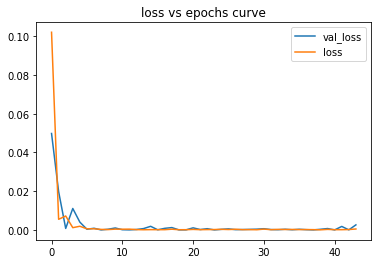

In [52]:
pd.DataFrame(model.history.history).plot(title="loss vs epochs curve")

In [53]:
model.history.history.keys()

dict_keys(['val_loss', 'loss'])

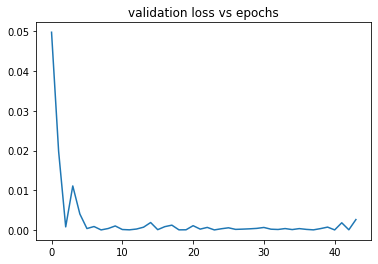

In [54]:
loss_1 = model.history.history["val_loss"]
plt.title("validation loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

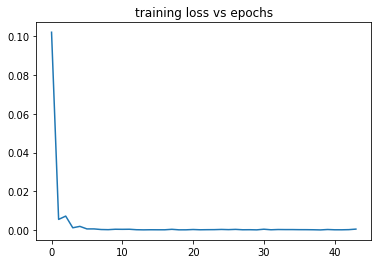

In [55]:
loss_1 = model.history.history["loss"]
plt.title("training loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

In [56]:
# list of predictions
test_prediction = []

#last `n_input` points from training set
current_batch = normal_train[-n_input:].reshape(1,n_input,n_features)

In [57]:
current_batch.shape

(1, 10, 1)

In [58]:
# forecast the number of confirmed cases in Iran for validation set and the next 7 days

for i in range(n_steps+7):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [59]:
test_prediction

[array([1.0053258], dtype=float32),
 array([1.0149444], dtype=float32),
 array([1.0247546], dtype=float32),
 array([1.034222], dtype=float32),
 array([1.0436188], dtype=float32),
 array([1.0530915], dtype=float32),
 array([1.062229], dtype=float32),
 array([1.0713556], dtype=float32),
 array([1.0807458], dtype=float32),
 array([1.0901542], dtype=float32),
 array([1.0996971], dtype=float32),
 array([1.1095135], dtype=float32),
 array([1.1193284], dtype=float32),
 array([1.129136], dtype=float32),
 array([1.1389976], dtype=float32),
 array([1.148918], dtype=float32),
 array([1.1588979], dtype=float32)]

In [60]:
# apply inverse transformations on scaled data
true_prediction = normal.inverse_transform(test_prediction)
true_prediction[:,0]

array([256475.70064402, 258929.57921112, 261432.33037055, 263847.61570823,
       266244.89695466, 268661.55084658, 270992.685305  , 273321.02183032,
       275716.63039935, 278116.86164045, 280551.42838669, 283055.76098657,
       285559.69822633, 288061.7803148 , 290577.63918257, 293108.5217346 ,
       295654.54962015])

In [61]:
# number of days in future considered to forecast
future_days = 7

# first date of test
first_date = iran_df1.iloc[train_size:]['Date'].tolist()[0]
first_date=pd.to_datetime(first_date)
print(type(first_date))
# find dates related to days from start of test set to future
dates_first_to_futures = pd.Series([(first_date + timedelta(days=i)) for i in range(n_steps+7)])
print(dates_first_to_futures.shape)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
(17,)


In [62]:
prediction_df = pd.DataFrame(columns=["confirmed","confirmed_predicted"],index=dates_first_to_futures)
prediction_df

,confirmed,confirmed_predicted
2020-07-12,NaN,NaN
2020-07-13,NaN,NaN
2020-07-14,NaN,NaN
2020-07-15,NaN,NaN
2020-07-16,NaN,NaN
2020-07-17,NaN,NaN
2020-07-18,NaN,NaN
2020-07-19,NaN,NaN
2020-07-20,NaN,NaN
2020-07-21,NaN,NaN


In [63]:
prediction_df.loc[:,"confirmed_predicted"] = true_prediction[:,0]
test_set=iran_df1.iloc[train_size:]['Confirmed'].values.tolist()
prediction_df.loc[:n_steps,"confirmed"] = iran_df1.iloc[train_size:]['Confirmed'].values.tolist()
prediction_df

,confirmed,confirmed_predicted
2020-07-12,257303,256475.700644
2020-07-13,259652,258929.579211
2020-07-14,262173,261432.330371
2020-07-15,264561,263847.615708
2020-07-16,267061,266244.896955
2020-07-17,269440,268661.550847
2020-07-18,271606,270992.685305
2020-07-19,273788,273321.021830
2020-07-20,276202,275716.630399
2020-07-21,278827,278116.861640


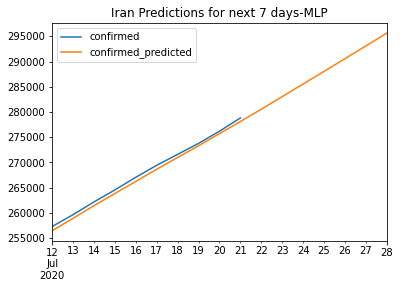

In [64]:
prediction_df.plot(title="Iran Predictions for next 7 days-MLP")

In [65]:
MAPE = np.mean(np.abs(np.array(prediction_df["confirmed"][:5]) -\
                      np.array(prediction_df["confirmed_predicted"][:5]))/np.array(prediction_df["confirmed"][:5]))
print("MAPE is " + str(MAPE*100) + " %")

MAPE is 0.2915001391473185 %


In [66]:
print("Accuracy: ", 100-MAPE,"%")

Accuracy:  99.99708499860853 %


### A recurrent neural network, Long Short-Term Memory network (LSTM)

In [67]:
# number of inputs and number of features
n_input = n_steps 
n_features = 1 
generator = TimeseriesGenerator(normal_train,normal_train,length = n_input,batch_size=1)
len(normal_train),len(generator)

(172, 162)

In [68]:
# number of samples
print('Samples: %d' % len(generator))

Samples: 162


In [69]:
# A recurrent neural network (LSTM) model with two hidden layers containing 150+75 nodes

#from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation

model = Sequential()
model.add(LSTM(150,activation="relu",input_shape=(n_input,n_features)))
#model.add(Dropout(0.2))
model.add(Dense(75, activation='relu'))
#model.add(Dense(10, activation='relu'))
model.add(Dense(units=1))
#model.add(Activation('softmax'))
#model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_3 (Dense)              (None, 75)                11325     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 76        
Total params: 102,601
Trainable params: 102,601
Non-trainable params: 0
_________________________________________________________________


In [71]:
validation_set = np.append(normal_train[-1],normal_test)
validation_set=validation_set.reshape(11,1)
validation_set

array([[1.        ],
       [1.00856862],
       [1.01777616],
       [1.0276579 ],
       [1.03701831],
       [1.04681773],
       [1.05614287],
       [1.06463309],
       [1.07318603],
       [1.08264835],
       [1.09293775]])

In [72]:
n_input = n_steps
n_features = 1
validation_gen = TimeseriesGenerator(validation_set,validation_set,length = n_input,batch_size=1)

In [73]:
# fit model
model.fit_generator(generator,validation_data=validation_gen,epochs=200,callbacks=[early_stop],steps_per_epoch=10)
#model.fit_generator(generator,validation_data=validation_gen,epochs=500,callbacks=[early_stop],steps_per_epoch=1)

Epoch 1/200
10/10 [==============================] - 0s 45ms/step - loss: 0.2200 - val_loss: 0.9153
Epoch 2/200
10/10 [==============================] - 0s 8ms/step - loss: 0.1057 - val_loss: 0.6170
Epoch 3/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0481 - val_loss: 0.2667
Epoch 4/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0160 - val_loss: 0.0010
Epoch 5/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0040 - val_loss: 0.0045
Epoch 6/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0156 - val_loss: 0.0074
Epoch 7/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0029 - val_loss: 0.0056
Epoch 8/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 9/200
10/10 [==============================] - 0s 10ms/step - loss: 7.6442e-04 - val_loss: 0.0070
Epoch 10/200
10/10 [==============================] - 0s 10ms/step - loss: 5.2267e-04 - val_loss: 0

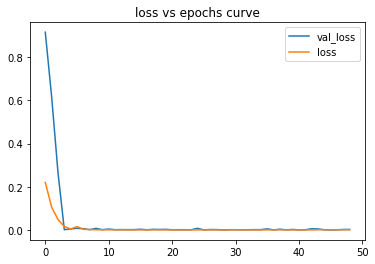

In [74]:
pd.DataFrame(model.history.history).plot(title="loss vs epochs curve")

In [75]:
model.history.history.keys()

dict_keys(['val_loss', 'loss'])

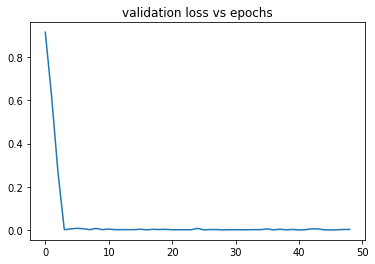

In [76]:
loss_1 = model.history.history["val_loss"]
plt.title("validation loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

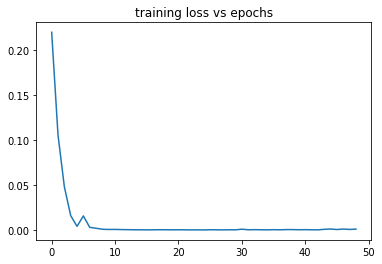

In [77]:
loss_1 = model.history.history["loss"]
plt.title("training loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

In [78]:
# list of predictions
test_prediction = []

#last `n_input` points from training set
current_batch = normal_train[-n_input:].reshape(1,n_input,n_features)

In [79]:
current_batch.shape

(1, 10, 1)

In [80]:
# forecast the number of confirmed cases in Iran for validation set and the next 7 days

for i in range(n_steps+7):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [81]:
test_prediction

[array([0.9953643], dtype=float32),
 array([1.0043648], dtype=float32),
 array([1.0132458], dtype=float32),
 array([1.0221086], dtype=float32),
 array([1.0309101], dtype=float32),
 array([1.0398145], dtype=float32),
 array([1.0486712], dtype=float32),
 array([1.0575656], dtype=float32),
 array([1.0666323], dtype=float32),
 array([1.0757984], dtype=float32),
 array([1.0850526], dtype=float32),
 array([1.0956413], dtype=float32),
 array([1.1065011], dtype=float32),
 array([1.1176844], dtype=float32),
 array([1.1292303], dtype=float32),
 array([1.1412014], dtype=float32),
 array([1.1536089], dtype=float32)]

In [82]:
# apply inverse transformations on scaled data
true_prediction = normal.inverse_transform(test_prediction)
true_prediction[:,0]

array([253934.35625517, 256230.54696214, 258496.23411584, 260757.26818514,
       263002.70073617, 265274.34870386, 267533.86215734, 269802.95549047,
       272116.025033  , 274454.45844734, 276815.36656344, 279516.71014845,
       282287.2417531 , 285140.28197193, 288085.83645701, 291139.87167442,
       294305.24638188])

In [83]:
# number of days in future considered to forecast
future_days = 7

# first date of test
first_date = iran_df1.iloc[train_size:]['Date'].tolist()[0]
first_date=pd.to_datetime(first_date)
print(type(first_date))
# find dates related to days from start of test set to future
dates_first_to_futures = pd.Series([(first_date + timedelta(days=i)) for i in range(n_steps+7)])
print(dates_first_to_futures.shape)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
(17,)


In [84]:
prediction_df = pd.DataFrame(columns=["confirmed","confirmed_predicted"],index=dates_first_to_futures)
prediction_df

,confirmed,confirmed_predicted
2020-07-12,NaN,NaN
2020-07-13,NaN,NaN
2020-07-14,NaN,NaN
2020-07-15,NaN,NaN
2020-07-16,NaN,NaN
2020-07-17,NaN,NaN
2020-07-18,NaN,NaN
2020-07-19,NaN,NaN
2020-07-20,NaN,NaN
2020-07-21,NaN,NaN


In [85]:
prediction_df.loc[:,"confirmed_predicted"] = true_prediction[:,0]
test_set=iran_df1.iloc[train_size:]['Confirmed'].values.tolist()
prediction_df.loc[:n_steps,"confirmed"] = iran_df1.iloc[train_size:]['Confirmed'].values.tolist()
prediction_df

,confirmed,confirmed_predicted
2020-07-12,257303,253934.356255
2020-07-13,259652,256230.546962
2020-07-14,262173,258496.234116
2020-07-15,264561,260757.268185
2020-07-16,267061,263002.700736
2020-07-17,269440,265274.348704
2020-07-18,271606,267533.862157
2020-07-19,273788,269802.955490
2020-07-20,276202,272116.025033
2020-07-21,278827,274454.458447


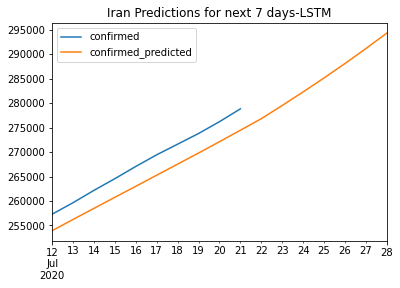

In [86]:
prediction_df.plot(title="Iran Predictions for next 7 days-LSTM")

In [87]:
MAPE = np.mean(np.abs(np.array(prediction_df["confirmed"][:5]) -\
                      np.array(prediction_df["confirmed_predicted"][:5]))/np.array(prediction_df["confirmed"][:5]))
print("MAPE is " + str(MAPE*100) + " %")

MAPE is 1.3973414116118406 %


In [88]:
print("Accuracy: ", 100-MAPE,"%")

Accuracy:  99.98602658588388 %


## Prediction of deaths of Iran using MLP and LSTM-RNN

In [89]:
iran_df1=iran_df[['Date','Deaths']].copy().loc[:]
iran_df1.head()

,Date,Deaths
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [90]:
len(iran_df1)

182

In [91]:
# the size of the validation set (number of steps), i.e taking `n_steps` data points to predict `n_steps+1`th data point
#The batches would be [feed=[t_1,...,t_{n_steps}],predict=tt_{n_steps+1}].

n_steps=10

#n_steps=5

# training set size
train_size=len(iran_df1)-n_steps

conf=iran_df1['Deaths'].values.reshape(-1,1)

# split training and test set
train = conf[:train_size]#['Deaths'].values.reshape(-1,1)
test = conf[train_size:]#['Deaths'].values.reshape(-1,1)

# scaling the data since the data is too skewed
normal = MinMaxScaler()

normal = normal.fit(train)

normal_train = normal.transform(train)
normal_test = normal.transform(test)

len(normal_train)

172

In [92]:
normal_test

array([[1.01535417],
       [1.03142066],
       [1.04558765],
       [1.06133755],
       [1.07700831],
       [1.09149189],
       [1.10637119],
       [1.12291254],
       [1.14008706],
       [1.15821132]])

### Multilayer Perceptron (MLP)

- Time Series Generator for generating batches for training/validation from a regular time series data.
- These batches will be fed to train the model.
- [How to use it for time series](https://machinelearningmastery.com/how-to-use-the-timeseriesgenerator-for-time-series-forecasting-in-keras/)

In [93]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [94]:
# number of inputs and number of features
n_input = n_steps 
print(n_input)
n_features = 1 
generator = TimeseriesGenerator(normal_train,normal_train,length = n_input,batch_size=1)
len(normal_train),len(generator)

10


(172, 162)

In [95]:
# number of samples
print('Samples: %d' % len(generator))

Samples: 162


In [96]:
for i in range(len(generator)-2,len(generator)):
	x, y = generator[i]
	print('%s => %s' % (x, y))

[[[0.85611397]
  [0.86727345]
  [0.87898694]
  [0.89117531]
  [0.9028888 ]
  [0.91578947]
  [0.92845271]
  [0.94428176]
  [0.95639098]
  [0.97388207]]] => [[0.9851207]]
[[[0.86727345]
  [0.87898694]
  [0.89117531]
  [0.9028888 ]
  [0.91578947]
  [0.92845271]
  [0.94428176]
  [0.95639098]
  [0.97388207]
  [0.9851207 ]]] => [[1.]]


In [97]:
# good estimation: input_neuron=3/2*num_hidden*num_input--->3/2x1x(len(df)-n_steps-batch_size)

In [98]:
# Multilayer Perceptron (MLP) model with one hidden layer

from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten

model = Sequential()
model.add(Dense(200, activation='relu',input_shape=(n_input,n_features)))
model.add(Flatten())
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

In [99]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10, 200)           400       
_________________________________________________________________
flatten_2 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2001      
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________


In [100]:
validation_set = np.append(normal_train[-1],normal_test)
validation_set=validation_set.reshape(n_steps+1,1)
validation_set

array([[1.        ],
       [1.01535417],
       [1.03142066],
       [1.04558765],
       [1.06133755],
       [1.07700831],
       [1.09149189],
       [1.10637119],
       [1.12291254],
       [1.14008706],
       [1.15821132]])

In [101]:
n_input = n_steps
n_features = 1
validation_gen = TimeseriesGenerator(validation_set,validation_set,length = n_input,batch_size=1)

In [102]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True)

In [103]:
# fit model

model.fit_generator(generator,validation_data=validation_gen,epochs=200,callbacks=[early_stop],steps_per_epoch=10)

Epoch 1/200
10/10 [==============================] - 0s 10ms/step - loss: 0.1528 - val_loss: 0.2451
Epoch 2/200
10/10 [==============================] - 0s 2ms/step - loss: 0.0116 - val_loss: 0.0015
Epoch 3/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0144 - val_loss: 0.0103
Epoch 4/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0037 - val_loss: 0.0023
Epoch 5/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0022 - val_loss: 0.0094
Epoch 6/200
10/10 [==============================] - 0s 10ms/step - loss: 9.7121e-04 - val_loss: 9.6723e-09
Epoch 7/200
10/10 [==============================] - 0s 10ms/step - loss: 8.8197e-04 - val_loss: 3.0462e-04
Epoch 8/200
10/10 [==============================] - 0s 10ms/step - loss: 3.3326e-04 - val_loss: 0.0015
Epoch 9/200
10/10 [==============================] - 0s 10ms/step - loss: 5.8859e-04 - val_loss: 6.7683e-04
Epoch 10/200
10/10 [==============================] - 0s 10ms/step - loss:

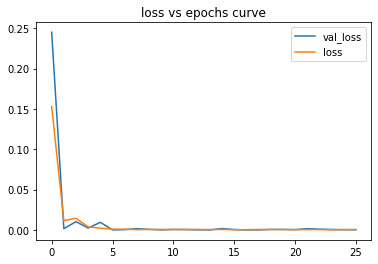

In [104]:
pd.DataFrame(model.history.history).plot(title="loss vs epochs curve")

In [105]:
model.history.history.keys()

dict_keys(['val_loss', 'loss'])

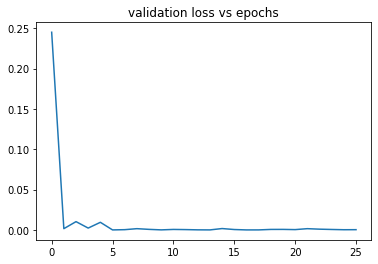

In [106]:
loss_1 = model.history.history["val_loss"]
plt.title("validation loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

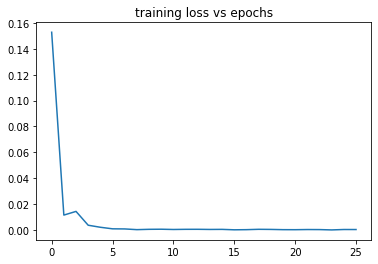

In [107]:
loss_1 = model.history.history["loss"]
plt.title("training loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

In [108]:
# list of predictions
test_prediction = []

#last `n_input` points from training set
current_batch = normal_train[-n_input:].reshape(1,n_input,n_features)

In [109]:
current_batch.shape

(1, 10, 1)

In [110]:
# forecast the number of Deaths cases in Iran for validation set and the next 7 days

for i in range(n_steps+7):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [111]:
test_prediction

[array([1.0179437], dtype=float32),
 array([1.0325905], dtype=float32),
 array([1.0477849], dtype=float32),
 array([1.0632741], dtype=float32),
 array([1.0791072], dtype=float32),
 array([1.0953337], dtype=float32),
 array([1.1111187], dtype=float32),
 array([1.1279765], dtype=float32),
 array([1.1444446], dtype=float32),
 array([1.1612697], dtype=float32),
 array([1.1785803], dtype=float32),
 array([1.1957346], dtype=float32),
 array([1.2131934], dtype=float32),
 array([1.2308598], dtype=float32),
 array([1.2487757], dtype=float32),
 array([1.2669467], dtype=float32),
 array([1.2852479], dtype=float32)]

In [112]:
# apply inverse transformations on scaled data
true_prediction = normal.inverse_transform(test_prediction)
true_prediction[:,0]

array([12861.71915352, 13046.7810744 , 13238.76252115, 13434.46882367,
       13634.51903403, 13839.54124153, 14038.98444951, 14251.98354185,
       14460.05732954, 14672.6422143 , 14891.36188984, 15108.10692489,
       15328.69881868, 15551.91302299, 15778.28122973, 16007.87121832,
       16239.10749376])

In [113]:
# number of days in future considered to forecast
future_days = 7

# first date of test
first_date = iran_df1.iloc[train_size:]['Date'].tolist()[0]
first_date=pd.to_datetime(first_date)
print(type(first_date))
# find dates related to days from start of test set to future
dates_first_to_futures = pd.Series([(first_date + timedelta(days=i)) for i in range(n_steps+7)])
print(dates_first_to_futures.shape)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
(17,)


In [114]:
prediction_df = pd.DataFrame(columns=["Deaths","Deaths_predicted"],index=dates_first_to_futures)
prediction_df

,Deaths,Deaths_predicted
2020-07-12,NaN,NaN
2020-07-13,NaN,NaN
2020-07-14,NaN,NaN
2020-07-15,NaN,NaN
2020-07-16,NaN,NaN
2020-07-17,NaN,NaN
2020-07-18,NaN,NaN
2020-07-19,NaN,NaN
2020-07-20,NaN,NaN
2020-07-21,NaN,NaN


In [115]:
prediction_df.loc[:,"Deaths_predicted"] = true_prediction[:,0]
test_set=iran_df1.iloc[train_size:]['Deaths'].values.tolist()
prediction_df.loc[:n_steps,"Deaths"] = iran_df1.iloc[train_size:]['Deaths'].values.tolist()
prediction_df

,Deaths,Deaths_predicted
2020-07-12,12829,12861.719154
2020-07-13,13032,13046.781074
2020-07-14,13211,13238.762521
2020-07-15,13410,13434.468824
2020-07-16,13608,13634.519034
2020-07-17,13791,13839.541242
2020-07-18,13979,14038.984450
2020-07-19,14188,14251.983542
2020-07-20,14405,14460.057330
2020-07-21,14634,14672.642214


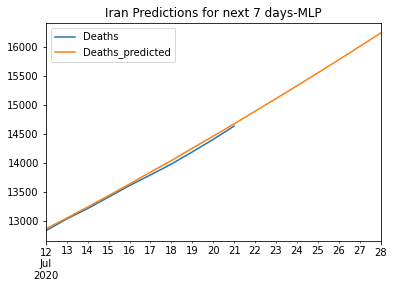

In [116]:
prediction_df.plot(title="Iran Predictions for next 7 days-MLP")

In [117]:
MAPE = np.mean(np.abs(np.array(prediction_df["Deaths"][:5]) -\
                      np.array(prediction_df["Deaths_predicted"][:5]))/np.array(prediction_df["Deaths"][:5]))
print("MAPE is " + str(MAPE*100) + " %")

MAPE is 0.1911908409212342 %


In [118]:
print("Accuracy: ", 100-MAPE,"%")

Accuracy:  99.99808809159079 %


### A recurrent neural network, Long Short-Term Memory network (LSTM)

In [119]:
# number of inputs and number of features
n_input = n_steps 
n_features = 1 
generator = TimeseriesGenerator(normal_train,normal_train,length = n_input,batch_size=1)
len(normal_train),len(generator)

(172, 162)

In [120]:
# number of samples
print('Samples: %d' % len(generator))

Samples: 162


In [121]:
# A recurrent neural network (LSTM) model with two hidden layers containing 150+75 nodes

#from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation

model = Sequential()
model.add(LSTM(150,activation="relu",input_shape=(n_input,n_features)))
#model.add(Dropout(0.2))
model.add(Dense(75, activation='relu'))
#model.add(Dense(10, activation='relu'))
model.add(Dense(units=1))
#model.add(Activation('softmax'))
#model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

In [122]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_7 (Dense)              (None, 75)                11325     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 76        
Total params: 102,601
Trainable params: 102,601
Non-trainable params: 0
_________________________________________________________________


In [123]:
validation_set = np.append(normal_train[-1],normal_test)
validation_set=validation_set.reshape(11,1)
validation_set

array([[1.        ],
       [1.01535417],
       [1.03142066],
       [1.04558765],
       [1.06133755],
       [1.07700831],
       [1.09149189],
       [1.10637119],
       [1.12291254],
       [1.14008706],
       [1.15821132]])

In [124]:
n_input = n_steps
n_features = 1
validation_gen = TimeseriesGenerator(validation_set,validation_set,length = n_input,batch_size=1)

In [125]:
# fit model
model.fit_generator(generator,validation_data=validation_gen,epochs=200,callbacks=[early_stop],steps_per_epoch=10)
#model.fit_generator(generator,validation_data=validation_gen,epochs=500,callbacks=[early_stop],steps_per_epoch=1)

Epoch 1/200
10/10 [==============================] - 0s 47ms/step - loss: 0.2656 - val_loss: 0.5170
Epoch 2/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0657 - val_loss: 0.0078
Epoch 3/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0180 - val_loss: 0.0034
Epoch 4/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0116 - val_loss: 0.0641
Epoch 5/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0038 - val_loss: 0.0064
Epoch 6/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0019 - val_loss: 7.9280e-04
Epoch 7/200
10/10 [==============================] - 0s 11ms/step - loss: 3.0966e-04 - val_loss: 1.5028e-05
Epoch 8/200
10/10 [==============================] - 0s 10ms/step - loss: 4.1117e-04 - val_loss: 4.6135e-06
Epoch 9/200
10/10 [==============================] - 0s 10ms/step - loss: 1.5005e-04 - val_loss: 8.7640e-04
Epoch 10/200
10/10 [==============================] - 0s 10ms/step - loss: 

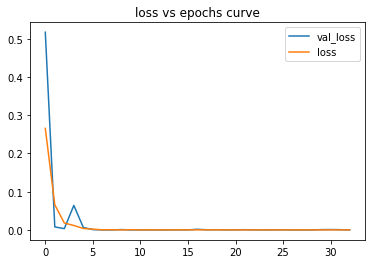

In [126]:
pd.DataFrame(model.history.history).plot(title="loss vs epochs curve")

In [127]:
model.history.history.keys()

dict_keys(['val_loss', 'loss'])

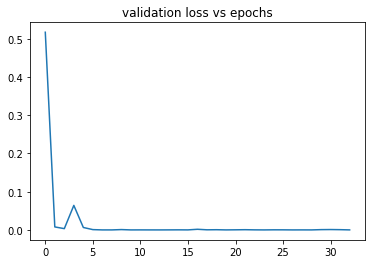

In [128]:
loss_1 = model.history.history["val_loss"]
plt.title("validation loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

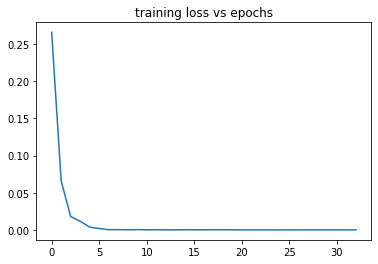

In [129]:
loss_1 = model.history.history["loss"]
plt.title("training loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

In [130]:
# list of predictions
test_prediction = []

#last `n_input` points from training set
current_batch = normal_train[-n_input:].reshape(1,n_input,n_features)

In [131]:
current_batch.shape

(1, 10, 1)

In [132]:
# forecast the number of Deaths cases in Iran for validation set and the next 7 days

for i in range(n_steps+7):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [133]:
test_prediction

[array([1.0034167], dtype=float32),
 array([1.0171741], dtype=float32),
 array([1.0312136], dtype=float32),
 array([1.0457321], dtype=float32),
 array([1.0606077], dtype=float32),
 array([1.0759768], dtype=float32),
 array([1.0916307], dtype=float32),
 array([1.1078318], dtype=float32),
 array([1.1243068], dtype=float32),
 array([1.1414741], dtype=float32),
 array([1.159187], dtype=float32),
 array([1.1782844], dtype=float32),
 array([1.1982042], dtype=float32),
 array([1.2190375], dtype=float32),
 array([1.2408514], dtype=float32),
 array([1.263744], dtype=float32),
 array([1.287774], dtype=float32)]

In [134]:
# apply inverse transformations on scaled data
true_prediction = normal.inverse_transform(test_prediction)
true_prediction[:,0]

array([12678.16946685, 12851.99506581, 13029.38435614, 13212.82559574,
       13400.77793241, 13594.96748209, 13792.75385976, 13997.45524466,
       14205.61639249, 14422.52560437, 14646.32723033, 14887.62347817,
       15139.30955827, 15402.53922701, 15678.15746784, 15967.4053973 ,
       16271.02407038])

In [135]:
# number of days in future considered to forecast
future_days = 7

# first date of test
first_date = iran_df1.iloc[train_size:]['Date'].tolist()[0]
first_date=pd.to_datetime(first_date)
print(type(first_date))
# find dates related to days from start of test set to future
dates_first_to_futures = pd.Series([(first_date + timedelta(days=i)) for i in range(n_steps+7)])
print(dates_first_to_futures.shape)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
(17,)


In [136]:
prediction_df = pd.DataFrame(columns=["Deaths","Deaths_predicted"],index=dates_first_to_futures)
prediction_df

,Deaths,Deaths_predicted
2020-07-12,NaN,NaN
2020-07-13,NaN,NaN
2020-07-14,NaN,NaN
2020-07-15,NaN,NaN
2020-07-16,NaN,NaN
2020-07-17,NaN,NaN
2020-07-18,NaN,NaN
2020-07-19,NaN,NaN
2020-07-20,NaN,NaN
2020-07-21,NaN,NaN


In [137]:
prediction_df.loc[:,"Deaths_predicted"] = true_prediction[:,0]
test_set=iran_df1.iloc[train_size:]['Deaths'].values.tolist()
prediction_df.loc[:n_steps,"Deaths"] = iran_df1.iloc[train_size:]['Deaths'].values.tolist()
prediction_df

,Deaths,Deaths_predicted
2020-07-12,12829,12678.169467
2020-07-13,13032,12851.995066
2020-07-14,13211,13029.384356
2020-07-15,13410,13212.825596
2020-07-16,13608,13400.777932
2020-07-17,13791,13594.967482
2020-07-18,13979,13792.753860
2020-07-19,14188,13997.455245
2020-07-20,14405,14205.616392
2020-07-21,14634,14422.525604


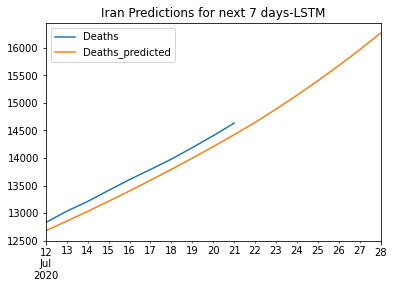

In [138]:
prediction_df.plot(title="Iran Predictions for next 7 days-LSTM")

In [139]:
MAPE = np.mean(np.abs(np.array(prediction_df["Deaths"][:5]) -\
                      np.array(prediction_df["Deaths_predicted"][:5]))/np.array(prediction_df["Deaths"][:5]))
print("MAPE is " + str(MAPE*100) + " %")

MAPE is 1.3849666137264618 %


In [140]:
print("Accuracy: ", 100-MAPE,"%")

Accuracy:  99.98615033386274 %


## Prediction of confirmed cases of the world using MLP and LSTM-RNN

In [141]:
covid19_world1=covid19_world[['Date','Confirmed']].copy().loc[:]
covid19_world1.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [142]:
len(covid19_world1)

182

In [143]:
# the size of the validation set (number of steps), i.e taking `n_steps` data points to predict `n_steps+1`th data point
#The batches would be [feed=[t_1,...,t_{n_steps}],predict=tt_{n_steps+1}].

n_steps=10

#n_steps=5

# training set size
train_size=len(covid19_world1)-n_steps

conf=covid19_world1['Confirmed'].values.reshape(-1,1)

# split training and test set
train = conf[:train_size]#['Confirmed'].values.reshape(-1,1)
test = conf[train_size:]#['Confirmed'].values.reshape(-1,1)

# scaling the data since the data is too skewed
normal = MinMaxScaler()

normal = normal.fit(train)

normal_train = normal.transform(train)
normal_test = normal.transform(test)

len(normal_train)

172

In [144]:
normal_test

array([[1.01514515],
       [1.03029902],
       [1.04770681],
       [1.0658745 ],
       [1.08572611],
       [1.10475219],
       [1.12343209],
       [1.14030495],
       [1.15655925],
       [1.17491056]])

### Multilayer Perceptron (MLP)

- Time Series Generator for generating batches for training/validation from a regular time series data.
- These batches will be fed to train the model.
- [How to use it for time series](https://machinelearningmastery.com/how-to-use-the-timeseriesgenerator-for-time-series-forecasting-in-keras/)

In [145]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [146]:
# number of inputs and number of features
n_input = n_steps 
print(n_input)
n_features = 1 
generator = TimeseriesGenerator(normal_train,normal_train,length = n_input,batch_size=1)
len(normal_train),len(generator)

10


(172, 162)

In [147]:
# number of samples
print('Samples: %d' % len(generator))

Samples: 162


In [148]:
for i in range(len(generator)-2,len(generator)):
	x, y = generator[i]
	print('%s => %s' % (x, y))

[[[0.82138247]
  [0.83849445]
  [0.85482162]
  [0.87081778]
  [0.88603359]
  [0.90039479]
  [0.9135492 ]
  [0.93012312]
  [0.94677235]
  [0.9647127 ]]] => [[0.982995]]
[[[0.83849445]
  [0.85482162]
  [0.87081778]
  [0.88603359]
  [0.90039479]
  [0.9135492 ]
  [0.93012312]
  [0.94677235]
  [0.9647127 ]
  [0.982995  ]]] => [[1.]]


In [149]:
# good estimation: input_neuron=3/2*num_hidden*num_input--->3/2x1x(len(df)-n_steps-batch_size)

In [150]:
# Multilayer Perceptron (MLP) model with one hidden layer

from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten

model = Sequential()
model.add(Dense(200, activation='relu',input_shape=(n_input,n_features)))
model.add(Flatten())
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

In [151]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10, 200)           400       
_________________________________________________________________
flatten_3 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 2001      
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________


In [152]:
validation_set = np.append(normal_train[-1],normal_test)
validation_set=validation_set.reshape(n_steps+1,1)
validation_set

array([[1.        ],
       [1.01514515],
       [1.03029902],
       [1.04770681],
       [1.0658745 ],
       [1.08572611],
       [1.10475219],
       [1.12343209],
       [1.14030495],
       [1.15655925],
       [1.17491056]])

In [153]:
n_input = n_steps
n_features = 1
validation_gen = TimeseriesGenerator(validation_set,validation_set,length = n_input,batch_size=1)

In [154]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True)

In [155]:
# fit model

model.fit_generator(generator,validation_data=validation_gen,epochs=200,callbacks=[early_stop],steps_per_epoch=10)

Epoch 1/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0996 - val_loss: 0.2123
Epoch 2/200
10/10 [==============================] - 0s 2ms/step - loss: 0.0122 - val_loss: 0.0135
Epoch 3/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0174 - val_loss: 0.0284
Epoch 4/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0043 - val_loss: 7.2559e-04
Epoch 5/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0021 - val_loss: 0.0074
Epoch 6/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0011 - val_loss: 3.4090e-04
Epoch 7/200
10/10 [==============================] - 0s 10ms/step - loss: 1.8166e-04 - val_loss: 0.0045
Epoch 8/200
10/10 [==============================] - 0s 10ms/step - loss: 2.9108e-04 - val_loss: 0.0071
Epoch 9/200
10/10 [==============================] - 0s 10ms/step - loss: 5.8900e-04 - val_loss: 2.6572e-04
Epoch 10/200
10/10 [==============================] - 0s 10ms/step - loss: 2.1

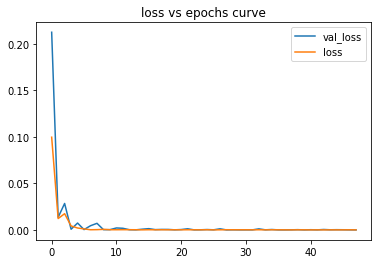

In [156]:
pd.DataFrame(model.history.history).plot(title="loss vs epochs curve")

In [157]:
model.history.history.keys()

dict_keys(['val_loss', 'loss'])

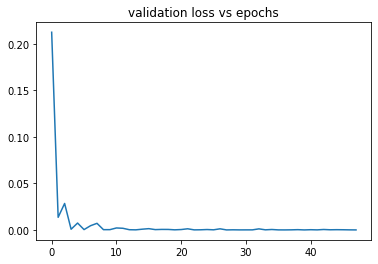

In [158]:
loss_1 = model.history.history["val_loss"]
plt.title("validation loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

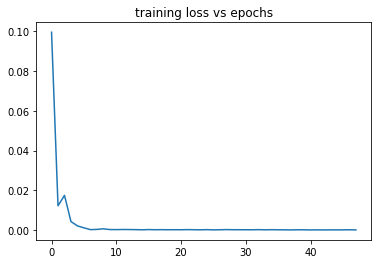

In [159]:
loss_1 = model.history.history["loss"]
plt.title("training loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

In [160]:
# list of predictions
test_prediction = []

#last `n_input` points from training set
current_batch = normal_train[-n_input:].reshape(1,n_input,n_features)

In [161]:
current_batch.shape

(1, 10, 1)

In [162]:
# forecast the number of confirmed cases in world for validation set and the next 7 days

for i in range(n_steps+7):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [163]:
test_prediction

[array([1.0082135], dtype=float32),
 array([1.0252584], dtype=float32),
 array([1.0423858], dtype=float32),
 array([1.0594095], dtype=float32),
 array([1.0763488], dtype=float32),
 array([1.0940144], dtype=float32),
 array([1.1119597], dtype=float32),
 array([1.1305174], dtype=float32),
 array([1.1487149], dtype=float32),
 array([1.1669377], dtype=float32),
 array([1.1850284], dtype=float32),
 array([1.2044542], dtype=float32),
 array([1.224099], dtype=float32),
 array([1.2439746], dtype=float32),
 array([1.2641269], dtype=float32),
 array([1.2847098], dtype=float32),
 array([1.3056319], dtype=float32)]

In [164]:
# apply inverse transformations on scaled data
true_prediction = normal.inverse_transform(test_prediction)
true_prediction[:,0]

array([12826475.74501085, 13043311.32185972, 13261196.32569766,
       13477761.96323431, 13693253.90957403, 13917985.96956182,
       14146275.76902414, 14382355.89571607, 14613854.63666523,
       14845674.87836826, 15075814.82367838, 15322938.19796348,
       15572848.9231242 , 15825694.10092056, 16082060.6218797 ,
       16343904.78775871, 16610063.43309426])

In [165]:
# number of days in future considered to forecast
future_days = 7

# first date of test
first_date = covid19_world1.iloc[train_size:]['Date'].tolist()[0]
first_date=pd.to_datetime(first_date)
print(type(first_date))
# find dates related to days from start of test set to future
dates_first_to_futures = pd.Series([(first_date + timedelta(days=i)) for i in range(n_steps+7)])
print(dates_first_to_futures.shape)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
(17,)


In [166]:
prediction_df = pd.DataFrame(columns=["confirmed","confirmed_predicted"],index=dates_first_to_futures)
prediction_df

,confirmed,confirmed_predicted
2020-07-12,NaN,NaN
2020-07-13,NaN,NaN
2020-07-14,NaN,NaN
2020-07-15,NaN,NaN
2020-07-16,NaN,NaN
2020-07-17,NaN,NaN
2020-07-18,NaN,NaN
2020-07-19,NaN,NaN
2020-07-20,NaN,NaN
2020-07-21,NaN,NaN


In [167]:
prediction_df.loc[:,"confirmed_predicted"] = true_prediction[:,0]
test_set=covid19_world1.iloc[train_size:]['Confirmed'].values.tolist()
prediction_df.loc[:n_steps,"confirmed"] = covid19_world1.iloc[train_size:]['Confirmed'].values.tolist()
prediction_df

,confirmed,confirmed_predicted
2020-07-12,12914656,1.282648e+07
2020-07-13,13107435,1.304331e+07
2020-07-14,13328887,1.326120e+07
2020-07-15,13560006,1.347776e+07
2020-07-16,13812547,1.369325e+07
2020-07-17,14054586,1.391799e+07
2020-07-18,14292221,1.414628e+07
2020-07-19,14506868,1.438236e+07
2020-07-20,14713646,1.461385e+07
2020-07-21,14947101,1.484567e+07


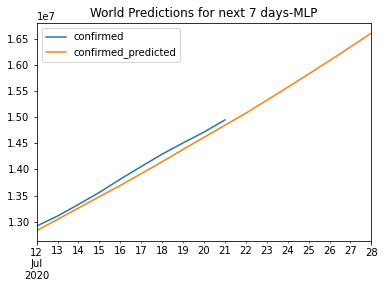

In [168]:
prediction_df.plot(title="World Predictions for next 7 days-MLP")

In [169]:
MAPE = np.mean(np.abs(np.array(prediction_df["confirmed"][:5]) -\
                      np.array(prediction_df["confirmed_predicted"][:5]))/np.array(prediction_df["confirmed"][:5]))
print("MAPE is " + str(MAPE*100) + " %")

MAPE is 0.6300068466533116 %


In [170]:
print("Accuracy: ", 100-MAPE,"%")

Accuracy:  99.99369993153347 %


### A recurrent neural network, Long Short-Term Memory network (LSTM)

In [171]:
# number of inputs and number of features
n_input = n_steps 
n_features = 1 
generator = TimeseriesGenerator(normal_train,normal_train,length = n_input,batch_size=1)
len(normal_train),len(generator)

(172, 162)

In [172]:
# number of samples
print('Samples: %d' % len(generator))

Samples: 162


In [173]:
# A recurrent neural network (LSTM) model with two hidden layers containing 150+75 nodes

#from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation

model = Sequential()
model.add(LSTM(150,activation="relu",input_shape=(n_input,n_features)))
#model.add(Dropout(0.2))
model.add(Dense(75, activation='relu'))
#model.add(Dense(10, activation='relu'))
model.add(Dense(units=1))
#model.add(Activation('softmax'))
#model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

In [174]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_11 (Dense)             (None, 75)                11325     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 76        
Total params: 102,601
Trainable params: 102,601
Non-trainable params: 0
_________________________________________________________________


In [175]:
validation_set = np.append(normal_train[-1],normal_test)
validation_set=validation_set.reshape(11,1)
validation_set

array([[1.        ],
       [1.01514515],
       [1.03029902],
       [1.04770681],
       [1.0658745 ],
       [1.08572611],
       [1.10475219],
       [1.12343209],
       [1.14030495],
       [1.15655925],
       [1.17491056]])

In [176]:
n_input = n_steps
n_features = 1
validation_gen = TimeseriesGenerator(validation_set,validation_set,length = n_input,batch_size=1)

In [177]:
# fit model
model.fit_generator(generator,validation_data=validation_gen,epochs=200,callbacks=[early_stop],steps_per_epoch=10)
#model.fit_generator(generator,validation_data=validation_gen,epochs=500,callbacks=[early_stop],steps_per_epoch=1)

Epoch 1/200
10/10 [==============================] - 0s 46ms/step - loss: 0.1841 - val_loss: 0.8224
Epoch 2/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0428 - val_loss: 0.4260
Epoch 3/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0266 - val_loss: 0.0484
Epoch 4/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0057 - val_loss: 4.6002e-04
Epoch 5/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0012 - val_loss: 0.1045
Epoch 6/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0082 - val_loss: 0.0039
Epoch 7/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0017 - val_loss: 0.0147
Epoch 8/200
10/10 [==============================] - 0s 10ms/step - loss: 4.1854e-04 - val_loss: 6.5869e-04
Epoch 9/200
10/10 [==============================] - 0s 10ms/step - loss: 5.0034e-04 - val_loss: 0.0235
Epoch 10/200
10/10 [==============================] - 0s 10ms/step - loss: 6.9693e-04 -

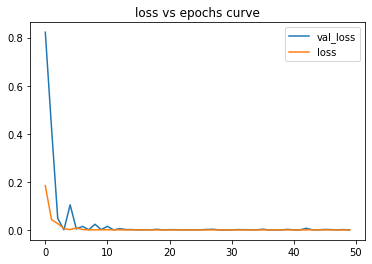

In [178]:
pd.DataFrame(model.history.history).plot(title="loss vs epochs curve")

In [179]:
model.history.history.keys()

dict_keys(['val_loss', 'loss'])

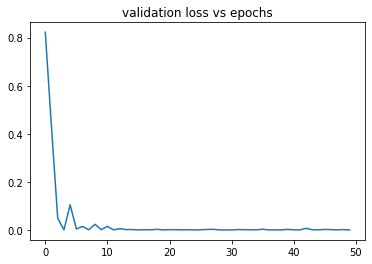

In [180]:
loss_1 = model.history.history["val_loss"]
plt.title("validation loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

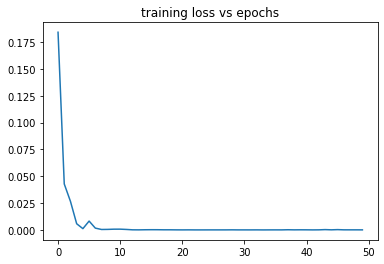

In [181]:
loss_1 = model.history.history["loss"]
plt.title("training loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

In [182]:
# list of predictions
test_prediction = []

#last `n_input` points from training set
current_batch = normal_train[-n_input:].reshape(1,n_input,n_features)

In [183]:
current_batch.shape

(1, 10, 1)

In [184]:
# forecast the number of confirmed cases in world for validation set and the next 7 days

for i in range(n_steps+7):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [185]:
test_prediction

[array([1.0035759], dtype=float32),
 array([1.0199447], dtype=float32),
 array([1.0365074], dtype=float32),
 array([1.0534229], dtype=float32),
 array([1.0708615], dtype=float32),
 array([1.0888163], dtype=float32),
 array([1.1071424], dtype=float32),
 array([1.1259798], dtype=float32),
 array([1.1451904], dtype=float32),
 array([1.1648072], dtype=float32),
 array([1.1849881], dtype=float32),
 array([1.2068216], dtype=float32),
 array([1.2295045], dtype=float32),
 array([1.2531263], dtype=float32),
 array([1.2777724], dtype=float32),
 array([1.3035516], dtype=float32),
 array([1.3305743], dtype=float32)]

In [186]:
# apply inverse transformations on scaled data
true_prediction = normal.inverse_transform(test_prediction)
true_prediction[:,0]

array([12767478.84016097, 12975712.75533056, 13186414.03713489,
       13401604.1973896 , 13623447.30013144, 13851858.42063296,
       14084993.47909832, 14324631.34526479, 14569017.41360295,
       14818571.75821102, 15075302.24228776, 15353054.62943185,
       15641613.68814266, 15942116.8031627 , 16255651.31430578,
       16583598.76490581, 16927366.4790175 ])

In [187]:
# number of days in future considered to forecast
future_days = 7

# first date of test
first_date = covid19_world1.iloc[train_size:]['Date'].tolist()[0]
first_date=pd.to_datetime(first_date)
print(type(first_date))
# find dates related to days from start of test set to future
dates_first_to_futures = pd.Series([(first_date + timedelta(days=i)) for i in range(n_steps+7)])
print(dates_first_to_futures.shape)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
(17,)


In [188]:
prediction_df = pd.DataFrame(columns=["confirmed","confirmed_predicted"],index=dates_first_to_futures)
prediction_df

,confirmed,confirmed_predicted
2020-07-12,NaN,NaN
2020-07-13,NaN,NaN
2020-07-14,NaN,NaN
2020-07-15,NaN,NaN
2020-07-16,NaN,NaN
2020-07-17,NaN,NaN
2020-07-18,NaN,NaN
2020-07-19,NaN,NaN
2020-07-20,NaN,NaN
2020-07-21,NaN,NaN


In [189]:
prediction_df.loc[:,"confirmed_predicted"] = true_prediction[:,0]
test_set=covid19_world1.iloc[train_size:]['Confirmed'].values.tolist()
prediction_df.loc[:n_steps,"confirmed"] = covid19_world1.iloc[train_size:]['Confirmed'].values.tolist()
prediction_df

,confirmed,confirmed_predicted
2020-07-12,12914656,1.276748e+07
2020-07-13,13107435,1.297571e+07
2020-07-14,13328887,1.318641e+07
2020-07-15,13560006,1.340160e+07
2020-07-16,13812547,1.362345e+07
2020-07-17,14054586,1.385186e+07
2020-07-18,14292221,1.408499e+07
2020-07-19,14506868,1.432463e+07
2020-07-20,14713646,1.456902e+07
2020-07-21,14947101,1.481857e+07


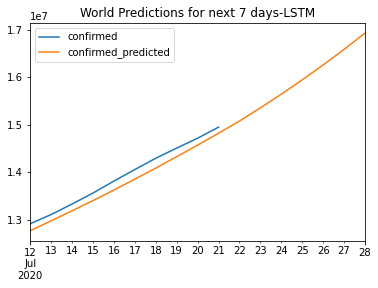

In [190]:
prediction_df.plot(title="World Predictions for next 7 days-LSTM")

In [191]:
MAPE = np.mean(np.abs(np.array(prediction_df["confirmed"][:5]) -\
                      np.array(prediction_df["confirmed_predicted"][:5]))/np.array(prediction_df["confirmed"][:5]))
print("MAPE is " + str(MAPE*100) + " %")

MAPE is 1.1501314830279412 %


In [192]:
print("Accuracy: ", 100-MAPE,"%")

Accuracy:  99.98849868516972 %


## Prediction of deaths of the world using MLP and LSTM-RNN

In [193]:
covid19_world1=covid19_world[['Date','Deaths']].copy().loc[:]
covid19_world1.head()

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56


In [194]:
len(covid19_world1)

182

In [195]:
# the size of the validation set (number of steps), i.e taking `n_steps` data points to predict `n_steps+1`th data point
#The batches would be [feed=[t_1,...,t_{n_steps}],predict=tt_{n_steps+1}].

n_steps=10

#n_steps=5

# training set size
train_size=len(covid19_world1)-n_steps

conf=covid19_world1['Deaths'].values.reshape(-1,1)

# split training and test set
train = conf[:train_size]#['Deaths'].values.reshape(-1,1)
test = conf[train_size:]#['Deaths'].values.reshape(-1,1)

# scaling the data since the data is too skewed
normal = MinMaxScaler()

normal = normal.fit(train)

normal_train = normal.transform(train)
normal_test = normal.transform(test)

len(normal_train)

172

In [196]:
normal_test

array([[1.00699795],
       [1.01374988],
       [1.02376717],
       [1.0334889 ],
       [1.0437522 ],
       [1.05568623],
       [1.06564512],
       [1.0727758 ],
       [1.07994011],
       [1.09095559]])

### Multilayer Perceptron (MLP)

- Time Series Generator for generating batches for training/validation from a regular time series data.
- These batches will be fed to train the model.
- [How to use it for time series](https://machinelearningmastery.com/how-to-use-the-timeseriesgenerator-for-time-series-forecasting-in-keras/)

In [197]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [198]:
# number of inputs and number of features
n_input = n_steps 
print(n_input)
n_features = 1 
generator = TimeseriesGenerator(normal_train,normal_train,length = n_input,batch_size=1)
len(normal_train),len(generator)

10


(172, 162)

In [199]:
# number of samples
print('Samples: %d' % len(generator))

Samples: 162


In [200]:
for i in range(len(generator)-2,len(generator)):
	x, y = generator[i]
	print('%s => %s' % (x, y))

[[[0.90473131]
  [0.91359998]
  [0.92266156]
  [0.9315019 ]
  [0.93923433]
  [0.94533143]
  [0.95205151]
  [0.96285992]
  [0.9722737 ]
  [0.98193348]]] => [[0.9913331]]
[[[0.91359998]
  [0.92266156]
  [0.9315019 ]
  [0.93923433]
  [0.94533143]
  [0.95205151]
  [0.96285992]
  [0.9722737 ]
  [0.98193348]
  [0.9913331 ]]] => [[1.]]


In [201]:
# good estimation: input_neuron=3/2*num_hidden*num_input--->3/2x1x(len(df)-n_steps-batch_size)

In [202]:
# Multilayer Perceptron (MLP) model with one hidden layer

from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten

model = Sequential()
model.add(Dense(200, activation='relu',input_shape=(n_input,n_features)))
model.add(Flatten())
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

In [203]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10, 200)           400       
_________________________________________________________________
flatten_4 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 2001      
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________


In [204]:
validation_set = np.append(normal_train[-1],normal_test)
validation_set=validation_set.reshape(n_steps+1,1)
validation_set

array([[1.        ],
       [1.00699795],
       [1.01374988],
       [1.02376717],
       [1.0334889 ],
       [1.0437522 ],
       [1.05568623],
       [1.06564512],
       [1.0727758 ],
       [1.07994011],
       [1.09095559]])

In [205]:
n_input = n_steps
n_features = 1
validation_gen = TimeseriesGenerator(validation_set,validation_set,length = n_input,batch_size=1)

In [206]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True)

In [207]:
# fit model

model.fit_generator(generator,validation_data=validation_gen,epochs=200,callbacks=[early_stop],steps_per_epoch=10)

Epoch 1/200
10/10 [==============================] - 0s 11ms/step - loss: 0.1498 - val_loss: 0.1058
Epoch 2/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0091 - val_loss: 0.0023
Epoch 3/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0043 - val_loss: 1.1570e-04
Epoch 4/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0013 - val_loss: 0.0057
Epoch 5/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0015 - val_loss: 7.8371e-04
Epoch 6/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0012 - val_loss: 3.2200e-04
Epoch 7/200
10/10 [==============================] - 0s 10ms/step - loss: 5.1250e-04 - val_loss: 8.1797e-05
Epoch 8/200
10/10 [==============================] - 0s 10ms/step - loss: 4.3855e-04 - val_loss: 1.3304e-05
Epoch 9/200
10/10 [==============================] - 0s 10ms/step - loss: 5.3685e-04 - val_loss: 0.0011
Epoch 10/200
10/10 [==============================] - 0s 10ms/step - l

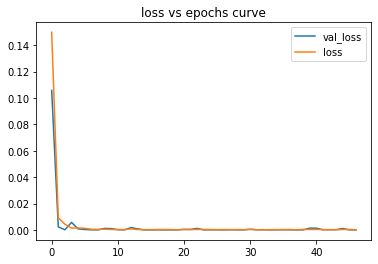

In [208]:
pd.DataFrame(model.history.history).plot(title="loss vs epochs curve")

In [209]:
model.history.history.keys()

dict_keys(['val_loss', 'loss'])

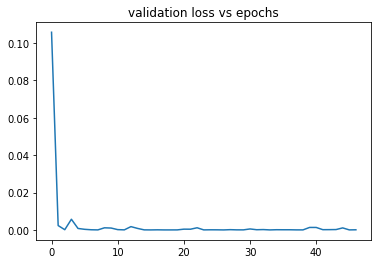

In [210]:
loss_1 = model.history.history["val_loss"]
plt.title("validation loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

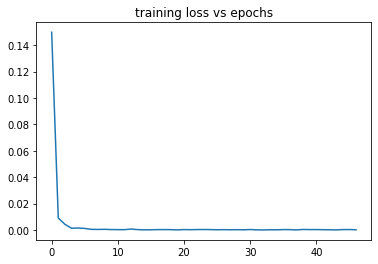

In [211]:
loss_1 = model.history.history["loss"]
plt.title("training loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

In [212]:
# list of predictions
test_prediction = []

#last `n_input` points from training set
current_batch = normal_train[-n_input:].reshape(1,n_input,n_features)

In [213]:
current_batch.shape

(1, 10, 1)

In [214]:
# forecast the number of Deaths cases in world for validation set and the next 7 days

for i in range(n_steps+7):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [215]:
test_prediction

[array([1.009305], dtype=float32),
 array([1.0185417], dtype=float32),
 array([1.0277888], dtype=float32),
 array([1.0368888], dtype=float32),
 array([1.0462873], dtype=float32),
 array([1.0558271], dtype=float32),
 array([1.0653048], dtype=float32),
 array([1.0748504], dtype=float32),
 array([1.0843791], dtype=float32),
 array([1.0939295], dtype=float32),
 array([1.1035646], dtype=float32),
 array([1.1132581], dtype=float32),
 array([1.1229776], dtype=float32),
 array([1.1327355], dtype=float32),
 array([1.1425588], dtype=float32),
 array([1.1524229], dtype=float32),
 array([1.1623279], dtype=float32)]

In [216]:
# apply inverse transformations on scaled data
true_prediction = normal.inverse_transform(test_prediction)
true_prediction[:,0]

array([570297.53918743, 575516.48339236, 580741.28756845, 585883.04180837,
       591193.38809228, 596583.61858082, 601938.68924236, 607332.22017443,
       612716.11919987, 618112.34437156, 623556.39229643, 629033.44465661,
       634525.1806227 , 640038.6052177 , 645589.00825143, 651162.44703388,
       656758.98892105])

In [217]:
# number of days in future considered to forecast
future_days = 7

# first date of test
first_date = covid19_world1.iloc[train_size:]['Date'].tolist()[0]
first_date=pd.to_datetime(first_date)
print(type(first_date))
# find dates related to days from start of test set to future
dates_first_to_futures = pd.Series([(first_date + timedelta(days=i)) for i in range(n_steps+7)])
print(dates_first_to_futures.shape)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
(17,)


In [218]:
prediction_df = pd.DataFrame(columns=["Deaths","Deaths_predicted"],index=dates_first_to_futures)
prediction_df

,Deaths,Deaths_predicted
2020-07-12,NaN,NaN
2020-07-13,NaN,NaN
2020-07-14,NaN,NaN
2020-07-15,NaN,NaN
2020-07-16,NaN,NaN
2020-07-17,NaN,NaN
2020-07-18,NaN,NaN
2020-07-19,NaN,NaN
2020-07-20,NaN,NaN
2020-07-21,NaN,NaN


In [219]:
prediction_df.loc[:,"Deaths_predicted"] = true_prediction[:,0]
test_set=covid19_world1.iloc[train_size:]['Deaths'].values.tolist()
prediction_df.loc[:n_steps,"Deaths"] = covid19_world1.iloc[train_size:]['Deaths'].values.tolist()
prediction_df

,Deaths,Deaths_predicted
2020-07-12,568994,570297.539187
2020-07-13,572809,575516.483392
2020-07-14,578469,580741.287568
2020-07-15,583962,585883.041808
2020-07-16,589761,591193.388092
2020-07-17,596504,596583.618581
2020-07-18,602131,601938.689242
2020-07-19,606160,607332.220174
2020-07-20,610208,612716.119200
2020-07-21,616432,618112.344372


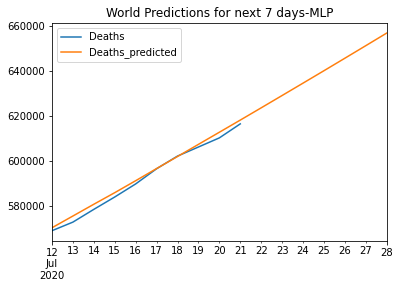

In [220]:
prediction_df.plot(title="World Predictions for next 7 days-MLP")

In [221]:
MAPE = np.mean(np.abs(np.array(prediction_df["Deaths"][:5]) -\
                      np.array(prediction_df["Deaths_predicted"][:5]))/np.array(prediction_df["Deaths"][:5]))
print("MAPE is " + str(MAPE*100) + " %")

MAPE is 0.3332833434543274 %


In [222]:
print("Accuracy: ", 100-MAPE,"%")

Accuracy:  99.99666716656546 %


### A recurrent neural network, Long Short-Term Memory network (LSTM)

In [223]:
# number of inputs and number of features
n_input = n_steps 
n_features = 1 
generator = TimeseriesGenerator(normal_train,normal_train,length = n_input,batch_size=1)
len(normal_train),len(generator)

(172, 162)

In [224]:
# number of samples
print('Samples: %d' % len(generator))

Samples: 162


In [225]:
# A recurrent neural network (LSTM) model with two hidden layers containing 150+75 nodes

#from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation

model = Sequential()
model.add(LSTM(150,activation="relu",input_shape=(n_input,n_features)))
#model.add(Dropout(0.2))
model.add(Dense(75, activation='relu'))
#model.add(Dense(10, activation='relu'))
model.add(Dense(units=1))
#model.add(Activation('softmax'))
#model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

In [226]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_15 (Dense)             (None, 75)                11325     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 76        
Total params: 102,601
Trainable params: 102,601
Non-trainable params: 0
_________________________________________________________________


In [227]:
validation_set = np.append(normal_train[-1],normal_test)
validation_set=validation_set.reshape(11,1)
validation_set

array([[1.        ],
       [1.00699795],
       [1.01374988],
       [1.02376717],
       [1.0334889 ],
       [1.0437522 ],
       [1.05568623],
       [1.06564512],
       [1.0727758 ],
       [1.07994011],
       [1.09095559]])

In [228]:
n_input = n_steps
n_features = 1
validation_gen = TimeseriesGenerator(validation_set,validation_set,length = n_input,batch_size=1)

In [229]:
# fit model
model.fit_generator(generator,validation_data=validation_gen,epochs=200,callbacks=[early_stop],steps_per_epoch=10)
#model.fit_generator(generator,validation_data=validation_gen,epochs=500,callbacks=[early_stop],steps_per_epoch=1)

Epoch 1/200
10/10 [==============================] - 0s 48ms/step - loss: 0.3094 - val_loss: 0.6473
Epoch 2/200
10/10 [==============================] - 0s 8ms/step - loss: 0.1159 - val_loss: 0.2508
Epoch 3/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0329 - val_loss: 0.0034
Epoch 4/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0052 - val_loss: 0.0044
Epoch 5/200
10/10 [==============================] - 0s 12ms/step - loss: 0.0024 - val_loss: 0.0589
Epoch 6/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0082 - val_loss: 0.0249
Epoch 7/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0059 - val_loss: 0.0048
Epoch 8/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0013 - val_loss: 7.6851e-04
Epoch 9/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0015 - val_loss: 5.5904e-04
Epoch 10/200
10/10 [==============================] - 0s 10ms/step - loss: 7.7758e-04 - val_loss:

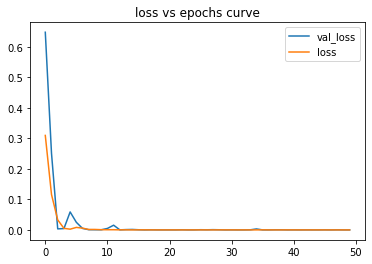

In [230]:
pd.DataFrame(model.history.history).plot(title="loss vs epochs curve")

In [231]:
model.history.history.keys()

dict_keys(['val_loss', 'loss'])

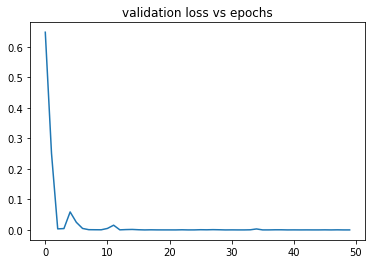

In [232]:
loss_1 = model.history.history["val_loss"]
plt.title("validation loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

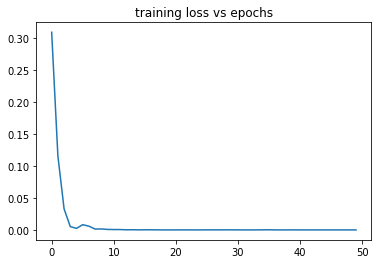

In [233]:
loss_1 = model.history.history["loss"]
plt.title("training loss vs epochs")
plt.plot(range(len(loss_1)),loss_1)

In [234]:
# list of predictions
test_prediction = []

#last `n_input` points from training set
current_batch = normal_train[-n_input:].reshape(1,n_input,n_features)

In [235]:
current_batch.shape

(1, 10, 1)

In [236]:
# forecast the number of Deaths cases in world for validation set and the next 7 days

for i in range(n_steps+7):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [237]:
test_prediction

[array([1.0059168], dtype=float32),
 array([1.0148091], dtype=float32),
 array([1.0237142], dtype=float32),
 array([1.0327241], dtype=float32),
 array([1.0419655], dtype=float32),
 array([1.0514547], dtype=float32),
 array([1.0609769], dtype=float32),
 array([1.0705976], dtype=float32),
 array([1.0803155], dtype=float32),
 array([1.0901518], dtype=float32),
 array([1.1001652], dtype=float32),
 array([1.1105263], dtype=float32),
 array([1.121091], dtype=float32),
 array([1.1318798], dtype=float32),
 array([1.1429074], dtype=float32),
 array([1.1541822], dtype=float32),
 array([1.1657104], dtype=float32)]

In [238]:
# apply inverse transformations on scaled data
true_prediction = normal.inverse_transform(test_prediction)
true_prediction[:,0]

array([568383.147228  , 573407.49997663, 578439.05981624, 583529.89292741,
       588751.46401596, 594113.06820858, 599493.33001053, 604929.29521656,
       610420.08819878, 615977.83303547, 621635.66887391, 627489.91478038,
       633459.20471847, 639555.12391853, 645785.95716739, 652156.48674035,
       658670.21514893])

In [239]:
# number of days in future considered to forecast
future_days = 7

# first date of test
first_date = covid19_world1.iloc[train_size:]['Date'].tolist()[0]
first_date=pd.to_datetime(first_date)
print(type(first_date))
# find dates related to days from start of test set to future
dates_first_to_futures = pd.Series([(first_date + timedelta(days=i)) for i in range(n_steps+7)])
print(dates_first_to_futures.shape)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
(17,)


In [240]:
prediction_df = pd.DataFrame(columns=["Deaths","Deaths_predicted"],index=dates_first_to_futures)
prediction_df

,Deaths,Deaths_predicted
2020-07-12,NaN,NaN
2020-07-13,NaN,NaN
2020-07-14,NaN,NaN
2020-07-15,NaN,NaN
2020-07-16,NaN,NaN
2020-07-17,NaN,NaN
2020-07-18,NaN,NaN
2020-07-19,NaN,NaN
2020-07-20,NaN,NaN
2020-07-21,NaN,NaN


In [241]:
prediction_df.loc[:,"Deaths_predicted"] = true_prediction[:,0]
test_set=covid19_world1.iloc[train_size:]['Deaths'].values.tolist()
prediction_df.loc[:n_steps,"Deaths"] = covid19_world1.iloc[train_size:]['Deaths'].values.tolist()
prediction_df

,Deaths,Deaths_predicted
2020-07-12,568994,568383.147228
2020-07-13,572809,573407.499977
2020-07-14,578469,578439.059816
2020-07-15,583962,583529.892927
2020-07-16,589761,588751.464016
2020-07-17,596504,594113.068209
2020-07-18,602131,599493.330011
2020-07-19,606160,604929.295217
2020-07-20,610208,610420.088199
2020-07-21,616432,615977.833035


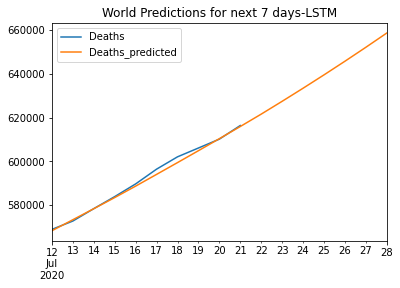

In [242]:
prediction_df.plot(title="World Predictions for next 7 days-LSTM")

In [243]:
MAPE = np.mean(np.abs(np.array(prediction_df["Deaths"][:5]) -\
                      np.array(prediction_df["Deaths_predicted"][:5]))/np.array(prediction_df["Deaths"][:5]))
print("MAPE is " + str(MAPE*100) + " %")

MAPE is 0.09243807279718443 %


In [244]:
print("Accuracy: ", 100-MAPE,"%")

Accuracy:  99.99907561927203 %


# Data modelling and prediction based on dataframes (multivariate time series)

## Predicting the total number of confirmed cases of the world

In [245]:
data = covid19_world.copy().drop(['Date'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Confirmed                182 non-null    int64  
 1   Deaths                   182 non-null    int64  
 2   Recovered                182 non-null    int64  
 3   Active                   182 non-null    int64  
 4   New confirmed            182 non-null    int64  
 5   New deaths               182 non-null    int64  
 6   New recovered            182 non-null    int64  
 7   Recovery rate(per 100)   182 non-null    float64
 8   Mortality rate(per 100)  182 non-null    float64
 9   Number of countries      182 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 14.3 KB


In [246]:
data.describe()

,Confirmed,Deaths,Recovered,Active,New confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100),Number of countries
count,1.820000e+02,182.000000,1.820000e+02,1.820000e+02,182.000000,182.000000,182.000000,182.00000,182.000000,182.000000
mean,4.024314e+06,217257.785714,1.822222e+06,1.984834e+06,82239.362637,3386.895604,45593.813187,33.34033,4.892637,142.895604
std,4.341807e+06,208112.153272,2.322991e+06,1.864916e+06,69859.536984,2504.148916,50677.967418,15.89596,1.600865,65.845165
min,5.550000e+02,17.000000,2.800000e+01,5.100000e+02,0.000000,0.000000,0.000000,1.71000,2.040000,6.000000
25%,1.062908e+05,3614.000000,5.720925e+04,5.772325e+04,4817.750000,216.250000,2430.000000,21.94500,3.450000,95.250000
50%,2.591061e+06,184500.500000,6.696375e+05,1.736923e+06,80182.000000,3976.000000,28652.000000,34.44500,4.945000,184.000000
75%,6.850280e+06,399905.750000,2.994759e+06,3.455616e+06,123650.500000,5311.000000,75868.250000,47.71000,6.375000,187.000000
max,1.494710e+07,616432.000000,8.298102e+06,6.032567e+06,252544.000000,8890.000000,283061.000000,55.52000,7.190000,187.000000


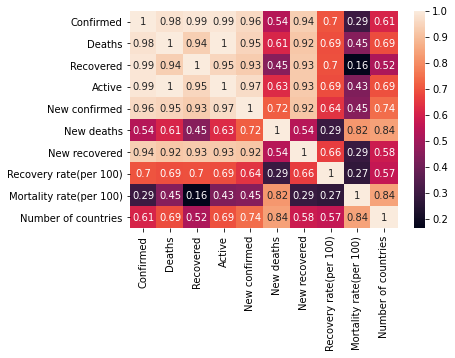

In [247]:
# Correlations

sns.heatmap(data.corr(), annot = True)

In [248]:
X=data.iloc[:,1:].values
y=data.iloc[:,0].values

In [249]:
#Splitting the dataset related to confirmed cases of the world into training and test sets

X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(X, y,test_size = 0.2,random_state=42)

print(X_train_confirmed.shape)
print(y_train_confirmed.shape)
print(X_test_confirmed.shape)
print(y_test_confirmed.shape)

(145, 9)
(145,)
(37, 9)
(37,)


### Decision tree regressor

RMSE of  DecisionTreeRegressor 123831.02
MAE of  DecisionTreeRegressor 90908.97 



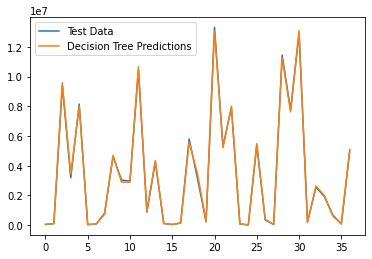

In [250]:
tree_reg = DecisionTreeRegressor(max_depth=8, random_state=42)

tree_reg.fit(X_train_confirmed, y_train_confirmed)

y_pred = tree_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'Decision Tree Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", tree_reg.__class__.__name__, round(rmse,2))
print("MAE of ", tree_reg.__class__.__name__, round(mae,2), '\n')

### Support vector machine regressor

RMSE of  SVR 3244493.15
MAE of  SVR 2741741.32 



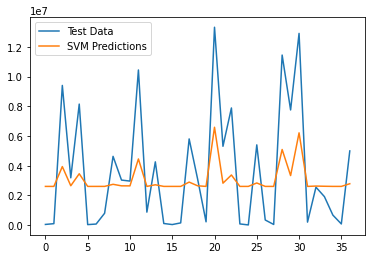

In [251]:
svm_reg = SVR(C=1000,kernel='poly')
svm_reg.fit(X_train_confirmed, y_train_confirmed)

y_pred = svm_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'SVM Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg.__class__.__name__, round(rmse,2))
print("MAE of ", svm_reg.__class__.__name__, round(mae,2), '\n')

RMSE of  SVR 1372208.15
MAE of  SVR 1295282.53 



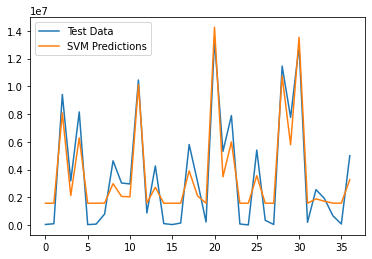

In [252]:
svm_reg = SVR(C=100000,kernel='poly')
svm_reg.fit(X_train_confirmed, y_train_confirmed)

y_pred = svm_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'SVM Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg.__class__.__name__, round(rmse,2))
print("MAE of ", svm_reg.__class__.__name__, round(mae,2), '\n')

RMSE of  SVR 800855.89
MAE of  SVR 670385.71 



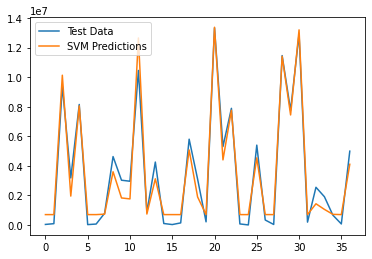

In [253]:
svm_reg = SVR(C=1000000,kernel='poly')
svm_reg.fit(X_train_confirmed, y_train_confirmed)

y_pred = svm_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'SVM Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg.__class__.__name__, round(rmse,2))
print("MAE of ", svm_reg.__class__.__name__, round(mae,2), '\n')

### Random Forests Regressor

RMSE of  RandomForestRegressor 57837.65
MAE of  RandomForestRegressor 37599.3 



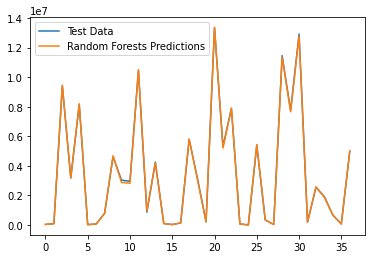

In [254]:
rf_reg = RandomForestRegressor(max_depth=9,n_estimators=5000, random_state=42)

rf_reg.fit(X_train_confirmed, y_train_confirmed)

y_pred = rf_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'Random Forests Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", rf_reg.__class__.__name__, round(rmse,2))
print("MAE of ", rf_reg.__class__.__name__, round(mae,2), '\n')

### XGBoost Regressor

In [255]:
xgb_reg=XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
xgb_reg.fit(X_train_confirmed, y_train_confirmed, early_stopping_rounds=10,
            eval_set=[(X_test_confirmed, y_test_confirmed)],verbose=0)

[13:09:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=4, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

RMSE of  XGBRegressor 106236.63
MAE of  XGBRegressor 79767.65 



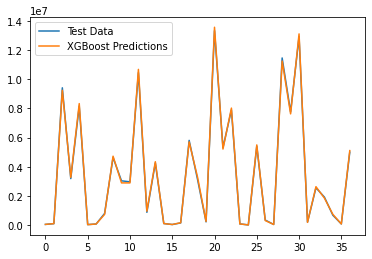

In [256]:
xgb_reg= XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1,
             n_estimators=1000, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

xgb_reg.fit(X_train_confirmed, y_train_confirmed)

y_pred = xgb_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'XGBoost Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", xgb_reg.__class__.__name__, round(rmse,2))
print("MAE of ", xgb_reg.__class__.__name__, round(mae,2), '\n')

## Add some new columns to data

In [257]:
data['Day'] = covid19_world['Date'].dt.day
data['Month'] = covid19_world['Date'].dt.month
data['Day of week'] = covid19_world['Date'].dt.dayofweek
data['Day of year'] = covid19_world['Date'].dt.dayofyear
data['Quarter'] = covid19_world['Date'].dt.quarter
data['Week of year'] = covid19_world['Date'].dt.weekofyear

In [258]:
data.head()

,Confirmed,Deaths,Recovered,Active,New confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100),Number of countries,Day,Month,Day of week,Day of year,Quarter,Week of year
0,555,17,28,510,0,0,0,5.05,3.06,6,22,1,2,22,1,4
1,654,18,30,606,99,1,2,4.59,2.75,8,23,1,3,23,1,4
2,941,26,36,879,287,8,6,3.83,2.76,9,24,1,4,24,1,4
3,1434,42,39,1353,493,16,3,2.72,2.93,11,25,1,5,25,1,4
4,2118,56,52,2010,684,14,13,2.46,2.64,13,26,1,6,26,1,4


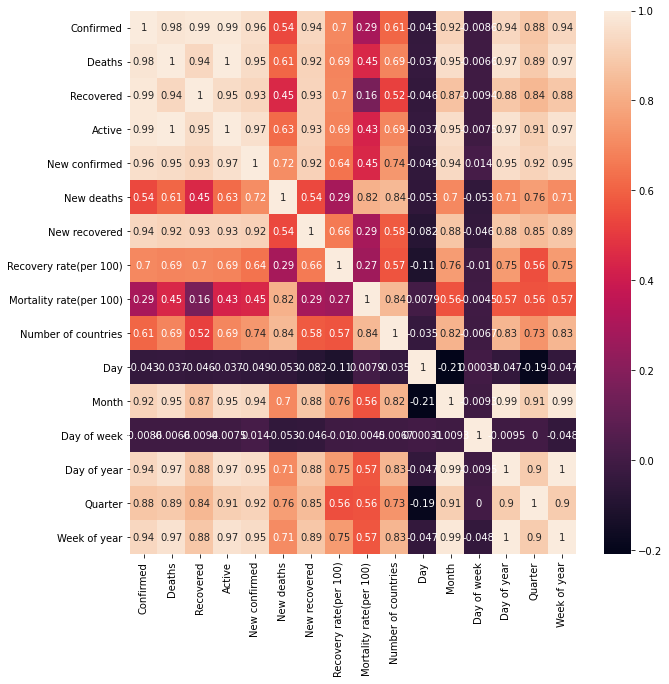

In [259]:
# Correlations
plt.figure(figsize= (10,10))
sns.heatmap(data.corr(), annot = True)

In [260]:
# drop some columns based on correlations

data=data.drop(['Day','Day of week'],axis=1)
data.head()

,Confirmed,Deaths,Recovered,Active,New confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100),Number of countries,Month,Day of year,Quarter,Week of year
0,555,17,28,510,0,0,0,5.05,3.06,6,1,22,1,4
1,654,18,30,606,99,1,2,4.59,2.75,8,1,23,1,4
2,941,26,36,879,287,8,6,3.83,2.76,9,1,24,1,4
3,1434,42,39,1353,493,16,3,2.72,2.93,11,1,25,1,4
4,2118,56,52,2010,684,14,13,2.46,2.64,13,1,26,1,4


In [261]:
X=data.iloc[:,1:].values
y=data.iloc[:,0].values

In [262]:
#Splitting the dataset related to confirmed cases of the world into training and test sets

X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(X, y,test_size = 0.2,random_state=42)

print(X_train_confirmed.shape)
print(y_train_confirmed.shape)
print(X_test_confirmed.shape)
print(y_test_confirmed.shape)

(145, 13)
(145,)
(37, 13)
(37,)


### Decision tree regressor

RMSE of  DecisionTreeRegressor 125949.49
MAE of  DecisionTreeRegressor 99727.19 



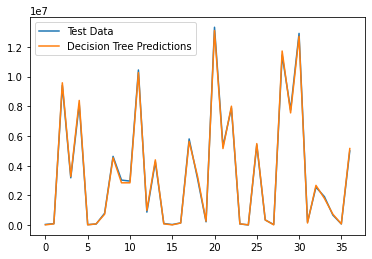

In [263]:
tree_reg = DecisionTreeRegressor(max_depth=6, random_state=42)

tree_reg.fit(X_train_confirmed, y_train_confirmed)

y_pred = tree_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'Decision Tree Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", tree_reg.__class__.__name__, round(rmse,2))
print("MAE of ", tree_reg.__class__.__name__, round(mae,2), '\n')

### Support vector machine regressor

RMSE of  SVR 3340428.6
MAE of  SVR 2794821.61 



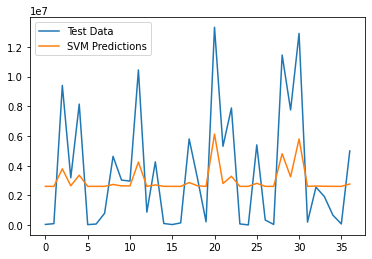

In [264]:
svm_reg = SVR(C=1000,kernel='poly')
svm_reg.fit(X_train_confirmed, y_train_confirmed)

y_pred = svm_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'SVM Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg.__class__.__name__, round(rmse,2))
print("MAE of ", svm_reg.__class__.__name__, round(mae,2), '\n')

RMSE of  SVR 814859.95
MAE of  SVR 710927.02 



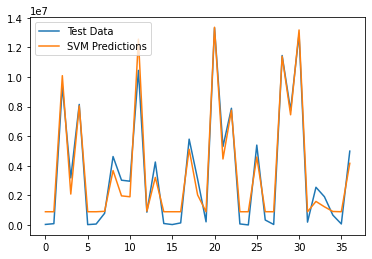

In [265]:
svm_reg = SVR(C=1000000,kernel='poly')
svm_reg.fit(X_train_confirmed, y_train_confirmed)

y_pred = svm_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'SVM Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg.__class__.__name__, round(rmse,2))
print("MAE of ", svm_reg.__class__.__name__, round(mae,2), '\n')

### Random Forests Regressor

RMSE of  RandomForestRegressor 57629.88
MAE of  RandomForestRegressor 34014.48 



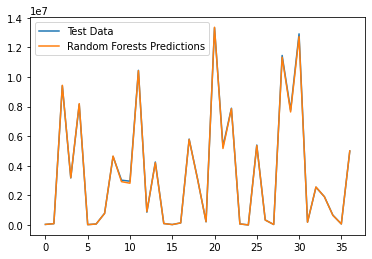

In [266]:
rf_reg = RandomForestRegressor(max_depth=8,n_estimators=5000, random_state=42)

rf_reg.fit(X_train_confirmed, y_train_confirmed)

y_pred = rf_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'Random Forests Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", rf_reg.__class__.__name__, round(rmse,2))
print("MAE of ", rf_reg.__class__.__name__, round(mae,2), '\n')

### XGBoost Regressor

In [267]:
xgb_reg=XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
xgb_reg.fit(X_train_confirmed, y_train_confirmed, early_stopping_rounds=10,
            eval_set=[(X_test_confirmed, y_test_confirmed)],verbose=0)

[13:09:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=4, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

RMSE of  XGBRegressor 106236.63
MAE of  XGBRegressor 79767.65 



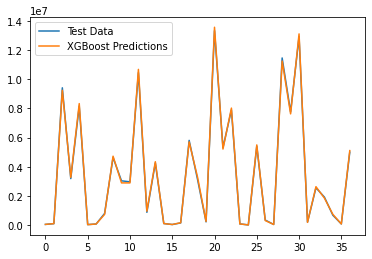

In [268]:
xgb_reg=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1,
             n_estimators=1000, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

xgb_reg.fit(X_train_confirmed, y_train_confirmed)

y_pred = xgb_reg.predict(X_test_confirmed)

plt.plot(y_test_confirmed)
plt.plot(y_pred)
plt.legend(['Test Data', 'XGBoost Predictions'])

mae=mean_absolute_error(y_pred, y_test_confirmed)
mse=mean_squared_error(y_pred, y_test_confirmed)
rmse = np.sqrt(mse)
print("RMSE of ", xgb_reg.__class__.__name__, round(rmse,2))
print("MAE of ", xgb_reg.__class__.__name__, round(mae,2), '\n')

## Predicting the total number of confirmed cases of the world after addition of some new features

In [269]:
data = covid19_country_latest.copy()
data.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100),WHO region
0,Afghanistan,35615,1186,23741,10688,89,1,0,66.66,3.33,EMRO
1,Albania,4290,117,2397,1776,119,4,45,55.87,2.73,EURO
2,Algeria,24278,1100,16646,6532,587,13,246,68.56,4.53,AFRO
3,Andorra,884,52,803,29,0,0,0,90.84,5.88,EURO
4,Angola,779,30,221,528,30,1,0,28.37,3.85,AFRO


In [270]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country/Region           187 non-null    object 
 1   Confirmed                187 non-null    int64  
 2   Deaths                   187 non-null    int64  
 3   Recovered                187 non-null    int64  
 4   Active                   187 non-null    int64  
 5   New confirmed            187 non-null    int64  
 6   New deaths               187 non-null    int64  
 7   New recovered            187 non-null    int64  
 8   Recovery rate(per 100)   187 non-null    float64
 9   Mortality rate(per 100)  187 non-null    float64
 10  WHO region               187 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 16.2+ KB


In [271]:
data.describe()

,Confirmed,Deaths,Recovered,Active,New confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100)
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000
mean,7.993102e+04,3296.427807,4.437488e+04,3.225972e+04,1249.010695,33.283422,923.374332,61.373102,3.098075
std,3.443003e+05,13424.220916,1.635133e+05,1.956334e+05,6261.879643,153.167945,4147.058236,28.825555,3.477342
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,-12.000000,-113.000000,0.000000,0.000000
25%,1.057000e+03,17.500000,3.255000e+02,1.250000e+02,2.000000,0.000000,0.000000,45.525000,0.990000
50%,5.027000e+03,93.000000,1.932000e+03,1.776000e+03,52.000000,0.000000,11.000000,66.660000,2.130000
75%,3.755850e+04,708.500000,1.961450e+04,8.462000e+03,396.000000,5.500000,242.500000,86.830000,3.835000
max,3.899211e+06,141995.000000,1.555339e+06,2.575198e+06,64534.000000,1367.000000,41039.000000,100.000000,27.990000


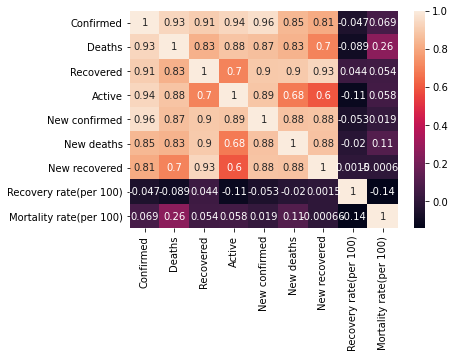

In [272]:
# Correlations

sns.heatmap(data.corr(), annot = True)

### Add new features related to happiness in life to the dataframe

In [273]:
data1=data.copy()

happiness_df = pd.read_csv("happiness.csv")
happiness_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [274]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [275]:
happiness_df1 = happiness_df[['Country or region', 'Healthy life expectancy']]

data1 = data1.merge(happiness_df1, left_on='Country/Region', right_on='Country or region').drop(['Country or region'],axis=1)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country/Region           144 non-null    object 
 1   Confirmed                144 non-null    int64  
 2   Deaths                   144 non-null    int64  
 3   Recovered                144 non-null    int64  
 4   Active                   144 non-null    int64  
 5   New confirmed            144 non-null    int64  
 6   New deaths               144 non-null    int64  
 7   New recovered            144 non-null    int64  
 8   Recovery rate(per 100)   144 non-null    float64
 9   Mortality rate(per 100)  144 non-null    float64
 10  WHO region               144 non-null    object 
 11  Healthy life expectancy  144 non-null    float64
dtypes: float64(3), int64(7), object(2)
memory usage: 14.6+ KB


In [276]:
data1.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100),WHO region,Healthy life expectancy
0,Afghanistan,35615,1186,23741,10688,89,1,0,66.66,3.33,EMRO,0.361
1,Albania,4290,117,2397,1776,119,4,45,55.87,2.73,EURO,0.874
2,Algeria,24278,1100,16646,6532,587,13,246,68.56,4.53,AFRO,0.785
3,Argentina,136118,2490,58598,75030,5344,117,2685,43.05,1.83,PAHO,0.881
4,Armenia,35254,662,24206,10386,273,12,704,68.66,1.88,EURO,0.815


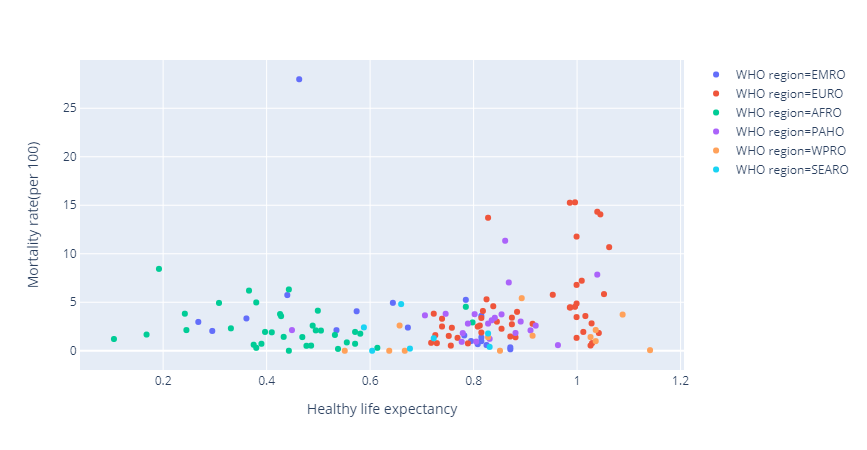

In [277]:
px.scatter(data1, y='Mortality rate(per 100)', x='Healthy life expectancy', color='WHO region', hover_data=['Country/Region'])

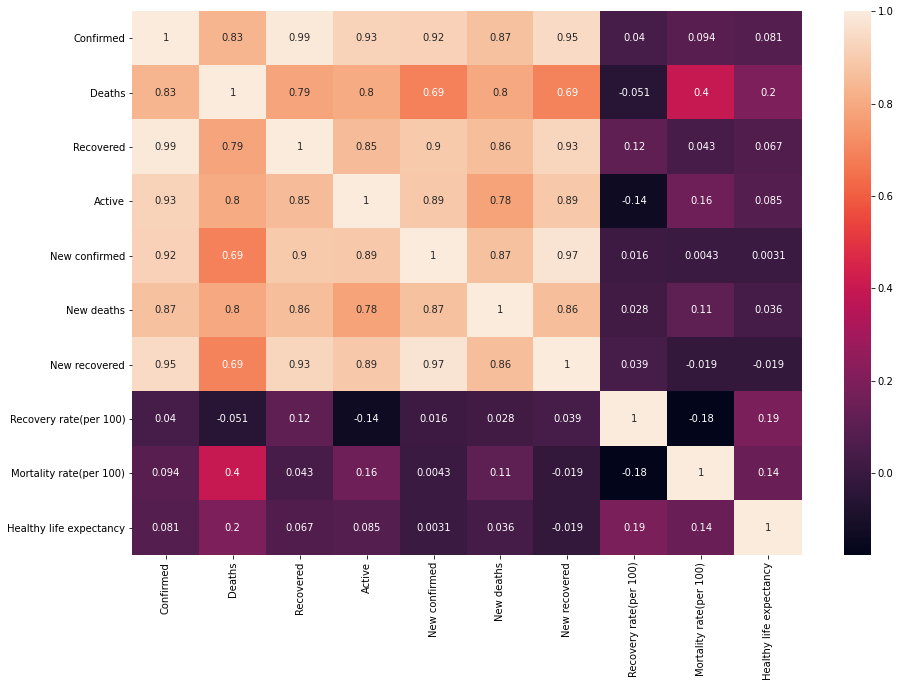

In [278]:
# Correlations
plt.figure(figsize= (15,10))
sns.heatmap(data1.corr(), annot = True)

**Conclusion:**
By the correlations above, it seems that the correlation between 'Healthy life expectancy' and 'Confirmed', 'Deaths', 'Recovered', 'Active','Recovery rate(per 100)'or 'Mortality rate(per 100)' is weak. So, such an addition may not help us in increasing the accuracy of predictions.

In [279]:
data1=data.copy()

In [280]:
happiness_df1 = happiness_df.drop(['Healthy life expectancy'],axis=1)

data1 = data1.merge(happiness_df1, left_on='Country/Region', right_on='Country or region').drop(['Country or region'],axis=1)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country/Region                144 non-null    object 
 1   Confirmed                     144 non-null    int64  
 2   Deaths                        144 non-null    int64  
 3   Recovered                     144 non-null    int64  
 4   Active                        144 non-null    int64  
 5   New confirmed                 144 non-null    int64  
 6   New deaths                    144 non-null    int64  
 7   New recovered                 144 non-null    int64  
 8   Recovery rate(per 100)        144 non-null    float64
 9   Mortality rate(per 100)       144 non-null    float64
 10  WHO region                    144 non-null    object 
 11  Overall rank                  144 non-null    int64  
 12  Score                         144 non-null    float64
 13  GDP p

In [281]:
data1.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100),WHO region,Overall rank,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,35615,1186,23741,10688,89,1,0,66.66,3.33,EMRO,154,3.203,0.350,0.517,0.000,0.158,0.025
1,Albania,4290,117,2397,1776,119,4,45,55.87,2.73,EURO,107,4.719,0.947,0.848,0.383,0.178,0.027
2,Algeria,24278,1100,16646,6532,587,13,246,68.56,4.53,AFRO,88,5.211,1.002,1.160,0.086,0.073,0.114
3,Argentina,136118,2490,58598,75030,5344,117,2685,43.05,1.83,PAHO,47,6.086,1.092,1.432,0.471,0.066,0.050
4,Armenia,35254,662,24206,10386,273,12,704,68.66,1.88,EURO,116,4.559,0.850,1.055,0.283,0.095,0.064


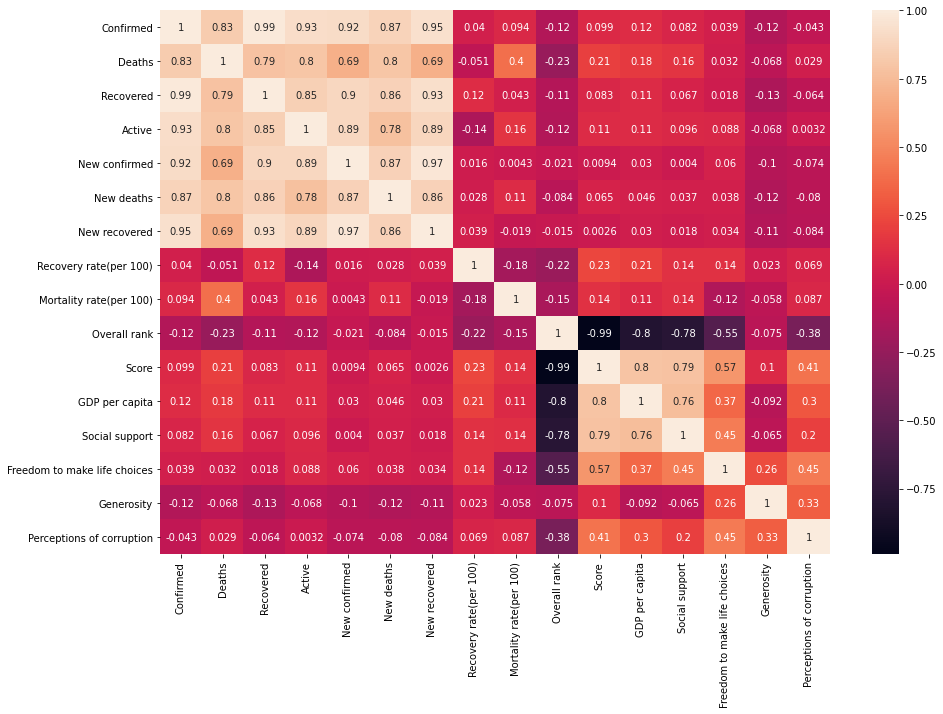

In [282]:
# Correlations
plt.figure(figsize= (15,10))
sns.heatmap(data1.corr(), annot = True)

**Conclusion:**
Similar to the previous case, the correlation between each of the added features and 'Confirmed', 'Deaths', 'Recovered', 'Active','Recovery rate(per 100)'or 'Mortality rate(per 100)' seems to be weak. So, such an addition may not help us in increasing the accuracy of predictions.

### Add new features related to populations to the dataframe

In [283]:
data1=data.copy()

population_df = pd.read_csv("population_by_country_2020.csv")
population_df.head()

,Country (or dependency),Population (2020),Yearly Change(percent),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop(percent),World Share(percent)
0,China,1438207241,0.39,5540090,153,9388211,-348399.0,1.7,38,61,18.47
1,India,1377233523,0.99,13586631,464,2973190,-532687.0,2.2,28,35,17.70
2,United States,330610570,0.59,1937734,36,9147420,954806.0,1.8,38,83,4.25
3,Indonesia,272931713,1.07,2898047,151,1811570,-98955.0,2.3,30,56,3.51
4,Pakistan,219992900,2.00,4327022,287,770880,-233379.0,3.6,23,35,2.83


In [284]:
population_df.shape

(235, 11)

In [285]:
population_df1 = population_df[['Country (or dependency)', 'Population (2020)']]

data1 = data1.merge(population_df1, left_on='Country/Region', right_on='Country (or dependency)').drop(['Country (or dependency)'],axis=1)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 175
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country/Region           176 non-null    object 
 1   Confirmed                176 non-null    int64  
 2   Deaths                   176 non-null    int64  
 3   Recovered                176 non-null    int64  
 4   Active                   176 non-null    int64  
 5   New confirmed            176 non-null    int64  
 6   New deaths               176 non-null    int64  
 7   New recovered            176 non-null    int64  
 8   Recovery rate(per 100)   176 non-null    float64
 9   Mortality rate(per 100)  176 non-null    float64
 10  WHO region               176 non-null    object 
 11  Population (2020)        176 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 17.9+ KB


In [286]:
data1.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,New confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100),WHO region,Population (2020)
0,Afghanistan,35615,1186,23741,10688,89,1,0,66.66,3.33,EMRO,38742911
1,Albania,4290,117,2397,1776,119,4,45,55.87,2.73,EURO,2878420
2,Algeria,24278,1100,16646,6532,587,13,246,68.56,4.53,AFRO,43685618
3,Andorra,884,52,803,29,0,0,0,90.84,5.88,EURO,77240
4,Angola,779,30,221,528,30,1,0,28.37,3.85,AFRO,32644783
5,Antigua and Barbuda,76,3,57,16,0,0,0,75.00,3.95,PAHO,97764
6,Argentina,136118,2490,58598,75030,5344,117,2685,43.05,1.83,PAHO,45111229
7,Armenia,35254,662,24206,10386,273,12,704,68.66,1.88,EURO,2962137
8,Australia,12894,128,8545,4221,466,2,147,66.27,0.99,WPRO,25439164
9,Austria,19827,710,17716,1401,84,-1,57,89.35,3.58,EURO,8996022


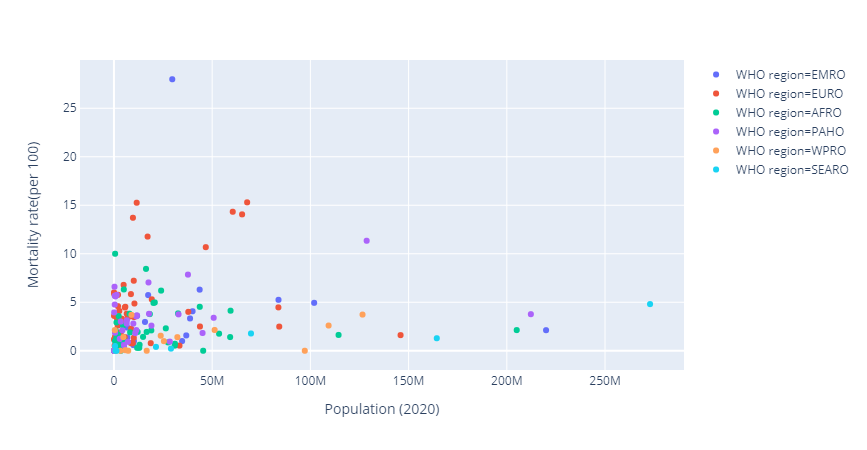

In [287]:
# remove countries with very high populations for beter visualization

data2 = data1[data1['Country/Region'].str.contains('China')!=True]
data2 = data2[data2['Country/Region'].str.contains('India')!=True]

px.scatter(data2, y='Mortality rate(per 100)', x='Population (2020)', color='WHO region', hover_data=['Country/Region'])

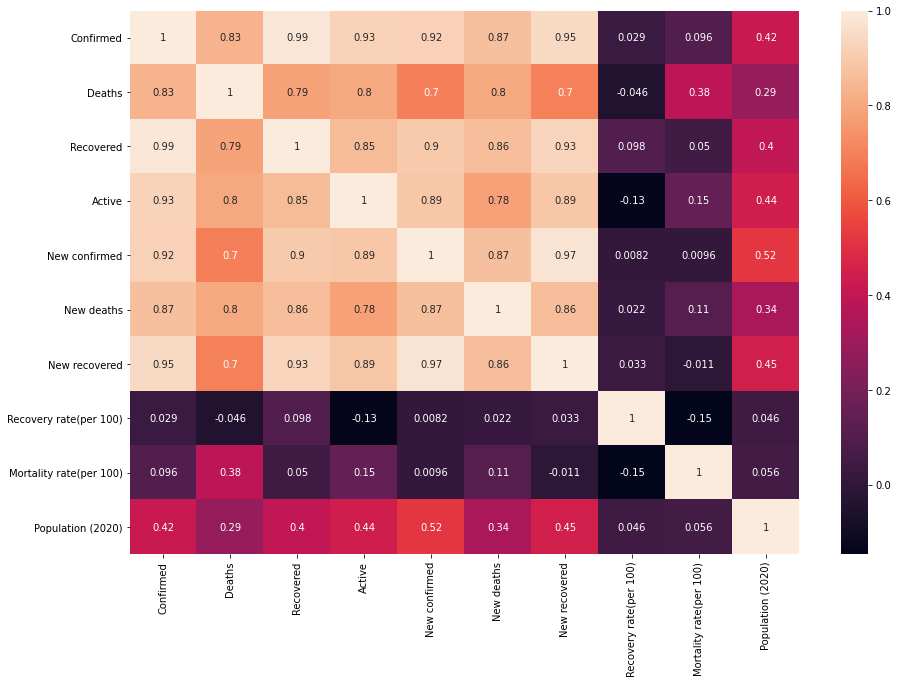

In [288]:
# Correlations
plt.figure(figsize= (15,10))
sns.heatmap(data1.corr(), annot = True)

**Conclusion:**
By the correlations above, it seems that the correlation between 'Population' and 'Confirmed' or 'Active' is moderate (near 0.4). Also, there exists a week correlation between 'Population' and 'Recovery rate(per 100)' or 'Mortality rate(per 100)'.